In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import seaborn as sns # Будем визулизировать данные этой библиотекой
import pandas as pd # Библиотека для работы с датафреймом
import numpy as np # Библиотека для работы с массивами
import matplotlib.pyplot as plt # Будем визулизировать данные этой библиотекой
sns.set_style('darkgrid')
from sklearn.preprocessing import StandardScaler # Масштабирование данных

In [ ]:
from tensorflow.keras import utils # Функции-утилиты для работы с категориальными данными
from tensorflow.keras.models import Sequential, Model # Класс для конструирования последовательной модели нейронной сети
from tensorflow.keras.layers import Dense, Dropout, SpatialDropout1D, BatchNormalization, Embedding, Flatten, Activation, Input, concatenate # Основные слои
from tensorflow.keras.layers import SimpleRNN, GRU, LSTM, Bidirectional, Conv1D, MaxPooling1D, GlobalMaxPooling1D # Основные слои
from tensorflow.keras.optimizers import Adam, Adadelta, SGD, Adagrad, RMSprop # Оптимизаторы
import re # Регулярные выражения
from sklearn.metrics import mean_squared_error, mean_absolute_error # Метрики для расчета ошибок
from sklearn.model_selection import train_test_split

In [ ]:
from keras.models import load_model

In [ ]:
!pip install autokeras

In [ ]:
import autokeras as ak

Using TensorFlow backend


## //База хороших клиентов

In [ ]:

data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Скоринг/db0.csv')# таблица по хорошим клиентам

data.head(5)

<ipython-input-5-53447475e3af>:1: DtypeWarning: Columns (15,31,33,37,40) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Скоринг/db0.csv')# таблица по хорошим клиентам


,region_name,city_name,population,date of birth,gender,education,position,dt_nbki,id_nbki,issued,...,amount_surety,surety_period,source_information,maximum_amount_overdue_indebtedness,date_credit_state,beginning_days_delinquency_counting,type_debt,amount_principal_debt_repaid,availability_support,Client_class
0,Новосибирская область,г. Барабинск,29122.0,1980-07-28,Женский,Высшее,работник бюджетной сферы,2023-03-05,27ab5815-bb2d-11ed-b80d-3cfdfed12971,2013-10-07,...,0.0,NaN,Банк,0.0,2023-01-12,2014-09-13 00:00:00,NaN,113018.48,0.0,0
1,Новосибирская область,г. Барабинск,29122.0,1980-07-28,Женский,Высшее,работник бюджетной сферы,2023-03-05,27ab5815-bb2d-11ed-b80d-3cfdfed12971,2013-11-06,...,0.0,NaN,Банк,0.0,2023-01-12,2014-09-02 00:00:00,NaN,9999.73,0.0,0
2,Новосибирская область,г. Барабинск,29122.0,1980-07-28,Женский,Высшее,работник бюджетной сферы,2023-03-05,27ab5815-bb2d-11ed-b80d-3cfdfed12971,2016-04-05,...,0.0,NaN,МФО,0.0,2016-04-14,NaN,NaN,5000.00,0.0,0
3,Новосибирская область,г. Барабинск,29122.0,1980-07-28,Женский,Высшее,работник бюджетной сферы,2023-03-05,27ab5815-bb2d-11ed-b80d-3cfdfed12971,2016-04-16,...,0.0,NaN,МФО,0.0,2016-05-12,NaN,NaN,5000.00,0.0,0
4,Новосибирская область,г. Барабинск,29122.0,1980-07-28,Женский,Высшее,работник бюджетной сферы,2023-03-05,27ab5815-bb2d-11ed-b80d-3cfdfed12971,2016-05-13,...,0.0,NaN,МФО,0.0,2016-06-11,NaN,NaN,5000.00,0.0,0


In [ ]:
data = data.assign(Client_class = 0)# добавление метки класса 1

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167105 entries, 0 to 167104
Data columns (total 42 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   region_name                          167083 non-null  object        
 1   city_name                            167083 non-null  object        
 2   population                           167083 non-null  float64       
 3   date of birth                        167105 non-null  datetime64[ns]
 4   gender                               167105 non-null  object        
 5   education                            120142 non-null  object        
 6   position                             152365 non-null  object        
 7   dt_nbki                              167105 non-null  datetime64[ns]
 8   id_nbki                              167105 non-null  object        
 9   issued                               167060 non-null  datetime64[ns]
 

In [ ]:
data.nunique()

region_name                               70
city_name                                747
population                               744
date of birth                           4353
gender                                     2
education                                  7
position                                  19
dt_nbki                                  398
id_nbki                                 5000
issued                                  4790
amount                                 25183
currency                                   2
type_credit                               17
status_credit                             12
period                                  6780
period_interest                         2256
psk                                    19212
balance                                72028
current_indebtedness                    1510
expired                                  737
days_overdue                            1708
next_payment                             949
last_payme

## //База плохих клиентов

In [ ]:
dataB = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Скоринг/db3.csv')# таблица по хорошим клиентам# таблица по плохим клиентам

dataB.head(5)

<ipython-input-6-52bbc4038c2f>:1: DtypeWarning: Columns (15,31,33,37) have mixed types. Specify dtype option on import or set low_memory=False.
  dataB = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Скоринг/db3.csv')# таблица по хорошим клиентам# таблица по плохим клиентам


,region_name,city_name,population,date of birth,gender,education,position,dt_nbki,id_nbki,issued,...,amount_surety,surety_period,source_information,maximum_amount_overdue_indebtedness,date_credit_state,beginning_days_delinquency_counting,type_debt,amount_principal_debt_repaid,availability_support,Client_class
0,Санкт-Петербург,г. Санкт-Петербург,5383890.0,1991-12-05 00:00:00,Мужской,СреднеТехническое,работник промышленных предприятий,2021-01-16,42c79e91-580e-11eb-b807-3cfdfed12971,2021-01-14,...,0.0,NaN,МФО,0.0,2021-01-15,2021-01-15,NaN,0.0,0.0,3
1,Ульяновская область,г. Димитровград,115253.0,1980-09-21 00:00:00,Мужской,Среднее,работник промышленных предприятий,2020-11-21,3ae2680a-2bfa-11eb-80c7-f4034344a6bd,2020-04-17,...,0.0,NaN,Банк,0.0,2020-11-18,2020-11-01,NaN,0.0,0.0,3
2,Ульяновская область,г. Димитровград,115253.0,1980-09-21 00:00:00,Мужской,Среднее,работник промышленных предприятий,2020-11-21,3ae2680a-2bfa-11eb-80c7-f4034344a6bd,2020-08-21,...,0.0,NaN,Банк,0.0,2020-11-18,2020-11-01,NaN,0.0,0.0,3
3,Ульяновская область,г. Димитровград,115253.0,1980-09-21 00:00:00,Мужской,Среднее,работник промышленных предприятий,2020-11-21,3ae2680a-2bfa-11eb-80c7-f4034344a6bd,2018-12-10,...,0.0,NaN,Банк,0.0,2018-12-10,2020-11-10,NaN,0.0,0.0,3
4,Ульяновская область,г. Димитровград,115253.0,1980-09-21 00:00:00,Мужской,Среднее,работник промышленных предприятий,2020-11-21,3ae2680a-2bfa-11eb-80c7-f4034344a6bd,2020-11-04,...,0.0,NaN,МФО,0.0,2020-11-16,2020-11-05,NaN,0.0,0.0,3


In [ ]:
dataB = dataB.assign(Client_class = 3)# добавление метки класса 4

In [ ]:
dataB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67563 entries, 0 to 67562
Data columns (total 42 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   region_name                          67563 non-null  object        
 1   city_name                            67563 non-null  object        
 2   population                           67563 non-null  int64         
 3   date of birth                        67563 non-null  datetime64[ns]
 4   gender                               67563 non-null  object        
 5   education                            67244 non-null  object        
 6   position                             67245 non-null  object        
 7   dt_nbki                              67563 non-null  datetime64[ns]
 8   id_nbki                              67563 non-null  object        
 9   issued                               67189 non-null  datetime64[ns]
 10  amount    

In [ ]:
dataB.nunique()

region_name                               69
city_name                                674
population                               672
date of birth                           3960
gender                                     2
education                                  7
position                                  20
dt_nbki                                  927
id_nbki                                 4588
issued                                  5594
amount                                 12183
currency                                   2
type_credit                               16
status_credit                             12
period                                  7549
period_interest                         6867
psk                                    11051
balance                                27198
current_indebtedness                    9723
expired                                 4122
days_overdue                           12301
next_payment                            5357
last_payme

## //База 2 класс

In [ ]:
data2 = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Скоринг/db1.csv')# таблица по хорошим клиентам# таблица 2 класс

data2.head(5)

<ipython-input-7-39be252c9f0b>:1: DtypeWarning: Columns (15,31,33,37,38) have mixed types. Specify dtype option on import or set low_memory=False.
  data2 = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Скоринг/db1.csv')# таблица по хорошим клиентам# таблица 2 класс


,region_name,city_name,population,date of birth,gender,education,position,dt_nbki,id_nbki,issued,...,amount_surety,surety_period,source_information,maximum_amount_overdue_indebtedness,date_credit_state,beginning_days_delinquency_counting,type_debt,amount_principal_debt_repaid,availability_support,Client_class
0,Карелия республика,г. Лахденпохья,7512.0,1980-06-30,Женский,Высшее,работник социальной сферы,2020-07-10,bc73c7c3-c27b-11ea-80c3-f4034344a6bf,2020-07-08,...,0.0,NaN,МФО,0.0,2020-07-08,2020-07-08,NaN,0.0,0.0,1
1,Карелия республика,г. Лахденпохья,7512.0,1980-06-30,Женский,Высшее,работник социальной сферы,2020-07-10,bc73c7c3-c27b-11ea-80c3-f4034344a6bf,2013-05-21,...,0.0,NaN,Банк,0.0,2020-07-04,2020-07-04,NaN,0.0,0.0,1
2,Карелия республика,г. Лахденпохья,7512.0,1980-06-30,Женский,Высшее,работник социальной сферы,2020-07-10,bc73c7c3-c27b-11ea-80c3-f4034344a6bf,2012-12-29,...,0.0,NaN,Банк,0.0,2017-04-25,2020-07-02,NaN,0.0,0.0,1
3,Карелия республика,г. Лахденпохья,7512.0,1980-06-30,Женский,Высшее,работник социальной сферы,2020-07-10,bc73c7c3-c27b-11ea-80c3-f4034344a6bf,2020-06-10,...,0.0,NaN,МФО,0.0,2020-06-29,2020-07-01,NaN,0.0,0.0,1
4,Карелия республика,г. Лахденпохья,7512.0,1980-06-30,Женский,Высшее,работник социальной сферы,2020-07-10,bc73c7c3-c27b-11ea-80c3-f4034344a6bf,2020-06-07,...,0.0,NaN,МФО,0.0,2020-07-01,2020-07-01,NaN,0.0,0.0,1


In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293361 entries, 0 to 293360
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   region_name                          293276 non-null  object        
 1   city_name                            293276 non-null  object        
 2   population                           293276 non-null  float64       
 3   date of birth                        293361 non-null  datetime64[ns]
 4   gender                               293361 non-null  object        
 5   education                            293361 non-null  object        
 6   position                             293358 non-null  object        
 7   dt_nbki                              293361 non-null  datetime64[ns]
 8   id_nbki                              293361 non-null  object        
 9   issued                               293316 non-null  datetime64[ns]
 

In [ ]:
data2.nunique()

region_name                               70
city_name                                768
population                               765
date of birth                           4328
gender                                     2
education                                  6
position                                  21
dt_nbki                                  900
id_nbki                                 5000
issued                                  6203
amount                                 31513
currency                                   2
type_credit                               14
status_credit                             12
period                                  8318
period_interest                         8293
psk                                    36186
balance                                56902
current_indebtedness                   20835
expired                                 9517
days_overdue                           32532
next_payment                           10477
last_payme

In [ ]:
data2 = data2.assign(Client_class = 1)# добавление метки класса 2

In [ ]:
data2['position'].value_counts()

пенсионер                                 123846
рабочий                                    25725
сотрудник малого бизнеса                   23721
прочее                                     21346
работник промышленных предприятий          20525
сотрудники крупного бизнеса                15514
муниципальный служащий                     12055
работник бюджетной сферы                   10503
госслужащий                                 7538
военнослужащий                              6975
специалист                                  6870
работник с/х                                5195
индивидуальный предприниматель (ип)         4286
работник социальной сферы                   3553
руководитель                                2479
технический специалист                      2394
сотрудник градообразующего предприятия       389
самозанятый                                  262
разнорабочий                                  98
водитель                                      57
сварщик             

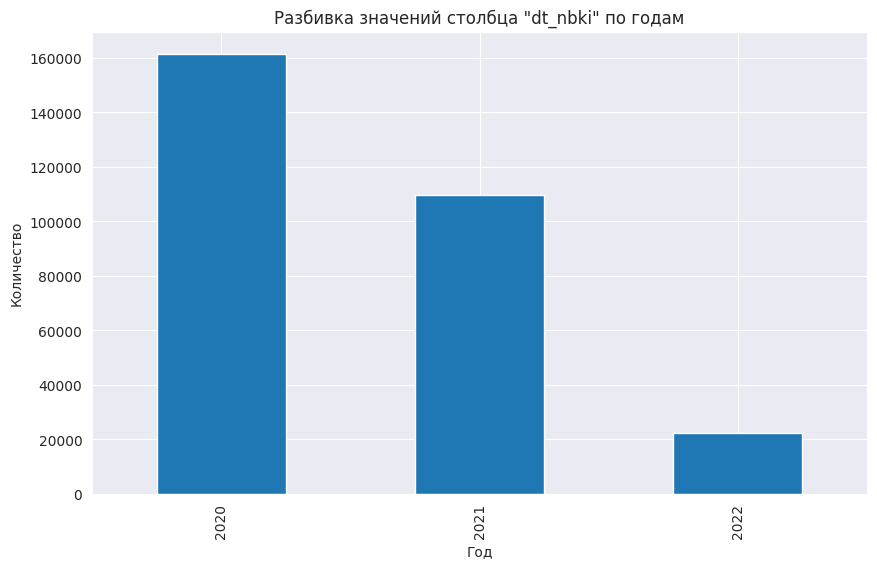

In [ ]:
# Преобразование столбца 'dt_nbki' в тип данных datetime, если он еще не является datetime
data2['dt_nbki'] = pd.to_datetime(data2['dt_nbki'])

# Разбивка значений столбца 'dt_nbki' по годам и подсчет количества
yearly_counts1 = data2['dt_nbki'].dt.year.value_counts()

# Сортировка по годам
yearly_counts1 = yearly_counts1.sort_index()

# Создание графика разбивки по годам
plt.figure(figsize=(10, 6))
yearly_counts1.plot(kind='bar')
plt.title('Разбивка значений столбца "dt_nbki" по годам')
plt.xlabel('Год')
plt.ylabel('Количество')
plt.show()

## //3 класс

In [ ]:
data3 =pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Скоринг/db2.csv')# таблица по хорошим клиентам# таблица 3 класс

data3.head(5)

<ipython-input-8-d6f2984b0736>:1: DtypeWarning: Columns (15,31,33,37) have mixed types. Specify dtype option on import or set low_memory=False.
  data3 =pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Скоринг/db2.csv')# таблица по хорошим клиентам# таблица 3 класс


,region_name,city_name,population,date of birth,gender,education,position,dt_nbki,id_nbki,issued,...,amount_surety,surety_period,source_information,maximum_amount_overdue_indebtedness,date_credit_state,beginning_days_delinquency_counting,type_debt,amount_principal_debt_repaid,availability_support,Client_class
0,Белгородская область,г.Валуйки,34104,1980-08-20,Мужской,Среднее,сотрудники крупного бизнеса,2022-08-02,9e193add-1229-11ed-80cf-f4034344a6bd,2022-06-26,...,0.0,NaN,Банк,0.0,2022-06-26,NaN,ПоОсновномуДолгу,3319.31,0.0,2
1,Белгородская область,г.Валуйки,34104,1980-08-20,Мужской,Среднее,сотрудники крупного бизнеса,2022-08-02,9e193add-1229-11ed-80cf-f4034344a6bd,2022-07-05,...,0.0,NaN,МФО,0.0,2022-07-21,NaN,ПоОсновномуДолгу,0.00,0.0,2
2,Белгородская область,г.Валуйки,34104,1980-08-20,Мужской,Среднее,сотрудники крупного бизнеса,2022-08-02,9e193add-1229-11ed-80cf-f4034344a6bd,2022-06-17,...,0.0,NaN,МФО,0.0,2022-07-20,NaN,ПоОсновномуДолгу,7000.00,0.0,2
3,Белгородская область,г.Валуйки,34104,1980-08-20,Мужской,Среднее,сотрудники крупного бизнеса,2022-08-02,9e193add-1229-11ed-80cf-f4034344a6bd,2022-07-21,...,0.0,NaN,МФО,0.0,2022-07-21,NaN,ПоОсновномуДолгу,0.00,0.0,2
4,Белгородская область,г.Валуйки,34104,1980-08-20,Мужской,Среднее,сотрудники крупного бизнеса,2022-08-02,9e193add-1229-11ed-80cf-f4034344a6bd,2022-07-25,...,0.0,NaN,МФО,0.0,2022-07-25,NaN,ПоОсновномуДолгу,0.00,0.0,2


In [ ]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28403 entries, 0 to 28402
Data columns (total 41 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   region_name                          28403 non-null  object        
 1   city_name                            28403 non-null  object        
 2   population                           28403 non-null  int64         
 3   date of birth                        28403 non-null  datetime64[ns]
 4   gender                               28403 non-null  object        
 5   education                            28358 non-null  object        
 6   position                             28403 non-null  object        
 7   dt_nbki                              28403 non-null  datetime64[ns]
 8   id_nbki                              28403 non-null  object        
 9   issued                               28371 non-null  datetime64[ns]
 10  amount    

In [ ]:
data3.nunique()

region_name                               69
city_name                                555
population                               553
date of birth                           1636
gender                                     2
education                                  6
position                                  19
dt_nbki                                  833
id_nbki                                 1727
issued                                  4639
amount                                  5907
currency                                   2
type_credit                               15
status_credit                             11
period                                  5332
period_interest                         4774
psk                                     5775
balance                                14151
current_indebtedness                    4727
expired                                 2226
days_overdue                            5983
next_payment                            2731
last_payme

In [ ]:
data3 = data3.assign(Client_class = 2)# добавление метки класса 3

In [ ]:
data3['position'].value_counts()

рабочий                                   5818
пенсионер                                 4734
сотрудник малого бизнеса                  3449
специалист                                2251
работник промышленных предприятий         1983
индивидуальный предприниматель (ип)       1612
сотрудники крупного бизнеса               1575
работник бюджетной сферы                  1286
военнослужащий                             988
руководитель                               946
прочее                                     865
самозанятый                                613
муниципальный служащий                     571
госслужащий                                544
работник с/х                               394
судебная власть, права человека            260
сотрудник градообразующего предприятия     238
технический специалист                     184
работник социальной сферы                   92
Name: position, dtype: int64

##Новая база

In [ ]:
data1_1 = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/Скоринг/Новая база/2624_res_1018_КИ_online.xlsx')# таблица 1 класс

data1_1.head(5)

,owner_id,contract_id,issue_dt,close_dt,region_name,city_name,population,date_of_birth,gender,education,...,volume_commitment,amount_surety,surety_period,source_information,maximum_amount_overdue_indebtedness,date_credit_state,beginning_days_delinquency_counting,type_debt,amount_principal_debt_repaid,availability_support
0,004df65f-5039-4786-a5e2-cc298f28eeaa,c3bb2aac-4e33-11ed-b81f-3cfdfed12dbd,2022-10-17,2022-11-19,Архангельская область,г. Северодвинск,182291,1981-10-29,Женский,NaN,...,NaN,0,NaN,Банк,0.00,2015-01-15,NaN,ПоОсновномуДолгу,140070.97,False
1,004df65f-5039-4786-a5e2-cc298f28eeaa,c3bb2aac-4e33-11ed-b81f-3cfdfed12dbd,2022-10-17,2022-11-19,Архангельская область,г. Северодвинск,182291,1981-10-29,Женский,NaN,...,NaN,0,NaN,Банк,3240.15,2018-06-18,NaN,ПоОсновномуДолгу,168000.00,False
2,004df65f-5039-4786-a5e2-cc298f28eeaa,c3bb2aac-4e33-11ed-b81f-3cfdfed12dbd,2022-10-17,2022-11-19,Архангельская область,г. Северодвинск,182291,1981-10-29,Женский,NaN,...,NaN,0,NaN,Банк,0.00,2015-12-17,NaN,ПоОсновномуДолгу,29356.04,False
3,004df65f-5039-4786-a5e2-cc298f28eeaa,c3bb2aac-4e33-11ed-b81f-3cfdfed12dbd,2022-10-17,2022-11-19,Архангельская область,г. Северодвинск,182291,1981-10-29,Женский,NaN,...,NaN,0,NaN,Банк,1157.42,2016-10-13,NaN,ПоОсновномуДолгу,0.00,False
4,004df65f-5039-4786-a5e2-cc298f28eeaa,c3bb2aac-4e33-11ed-b81f-3cfdfed12dbd,2022-10-17,2022-11-19,Архангельская область,г. Северодвинск,182291,1981-10-29,Женский,NaN,...,NaN,0,NaN,Банк,0.00,2021-10-01,NaN,ПоОсновномуДолгу,128642.19,False


In [ ]:
data1_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146090 entries, 0 to 146089
Data columns (total 45 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   owner_id                             146090 non-null  object        
 1   contract_id                          146090 non-null  object        
 2   issue_dt                             146090 non-null  datetime64[ns]
 3   close_dt                             146090 non-null  datetime64[ns]
 4   region_name                          146090 non-null  object        
 5   city_name                            146090 non-null  object        
 6   population                           146090 non-null  int64         
 7   date_of_birth                        146090 non-null  datetime64[ns]
 8   gender                               146090 non-null  object        
 9   education                            5563 non-null    object        
 

In [ ]:
data1_2 = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/Скоринг/Новая база/2624_res_5000_КИ_оффлайн.xlsx', header = 2)# таблица 1 класс

data1_2.head(5)

,owner_id,contract_id,issue_dt,close_dt,region_name,city_name,population,date_of_birth,gender,education,...,volume_commitment,amount_surety,surety_period,source_information,maximum_amount_overdue_indebtedness,date_credit_state,beginning_days_delinquency_counting,type_debt,amount_principal_debt_repaid,availability_support
0,0000d915-fe53-45b9-a46e-17cec73ae77e,c7ca01b7-4970-11ed-b81f-3cfdfed12dbd,2022-10-11,2022-10-20,Коми республика,г. Печора,40653.0,1988-06-18,Мужской,СреднеТехническое,...,NaN,0.0,NaT,Банк,73334.86,2019-11-28,NaT,ПоОсновномуДолгу,109513.29,0.0
1,0000d915-fe53-45b9-a46e-17cec73ae77e,c7ca01b7-4970-11ed-b81f-3cfdfed12dbd,2022-10-11,2022-10-20,Коми республика,г. Печора,40653.0,1988-06-18,Мужской,СреднеТехническое,...,NaN,0.0,NaT,МФО,0.00,2016-01-17,NaT,ПоОсновномуДолгу,3000.00,0.0
2,0000d915-fe53-45b9-a46e-17cec73ae77e,c7ca01b7-4970-11ed-b81f-3cfdfed12dbd,2022-10-11,2022-10-20,Коми республика,г. Печора,40653.0,1988-06-18,Мужской,СреднеТехническое,...,NaN,0.0,NaT,МФО,0.00,2015-12-26,NaT,ПоОсновномуДолгу,2000.00,0.0
3,0000d915-fe53-45b9-a46e-17cec73ae77e,c7ca01b7-4970-11ed-b81f-3cfdfed12dbd,2022-10-11,2022-10-20,Коми республика,г. Печора,40653.0,1988-06-18,Мужской,СреднеТехническое,...,NaN,0.0,NaT,МФО,0.00,2016-02-08,NaT,ПоОсновномуДолгу,4000.00,0.0
4,0000d915-fe53-45b9-a46e-17cec73ae77e,c7ca01b7-4970-11ed-b81f-3cfdfed12dbd,2022-10-11,2022-10-20,Коми республика,г. Печора,40653.0,1988-06-18,Мужской,СреднеТехническое,...,NaN,0.0,NaT,МФО,4000.00,2019-12-31,NaT,ПоОсновномуДолгу,4000.00,0.0


In [ ]:
data1_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95067 entries, 0 to 95066
Data columns (total 45 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   owner_id                             95067 non-null  object        
 1   contract_id                          95067 non-null  object        
 2   issue_dt                             95067 non-null  datetime64[ns]
 3   close_dt                             95067 non-null  datetime64[ns]
 4   region_name                          94897 non-null  object        
 5   city_name                            94897 non-null  object        
 6   population                           94897 non-null  float64       
 7   date_of_birth                        95067 non-null  datetime64[ns]
 8   gender                               95067 non-null  object        
 9   education                            95067 non-null  object        
 10  position  

In [ ]:
db1 = pd.concat((data1_1, data1_2))# объединение таблиц1, т.к. нужна общая база по клиентам для обучения модели.

In [ ]:
db1 = db1.assign(Client_class = 0)# добавление метки класса 1

In [ ]:
db1 = db1.drop(columns=['owner_id' ,'contract_id', 'issue_dt', 'close_dt'])

In [ ]:
db1 = db1.rename(columns = {'date_of_birth':'date of birth'})

In [ ]:
db1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 241157 entries, 0 to 95066
Data columns (total 42 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   region_name                          240987 non-null  object        
 1   city_name                            240987 non-null  object        
 2   population                           240987 non-null  float64       
 3   date of birth                        241157 non-null  datetime64[ns]
 4   gender                               241157 non-null  object        
 5   education                            100630 non-null  object        
 6   position                             229956 non-null  object        
 7   dt_nbki                              241157 non-null  datetime64[ns]
 8   id_nbki                              241157 non-null  object        
 9   issued                               240997 non-null  datetime64[ns]
 1

In [ ]:
data2_2 = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/Скоринг/Новая база/res_dashbrd01_2668_2class.xlsx')# таблица 2 класс

In [ ]:
data2_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048574 entries, 0 to 1048573
Data columns (total 42 columns):
 #   Column                               Non-Null Count    Dtype         
---  ------                               --------------    -----         
 0   region_name                          1048171 non-null  object        
 1   city_name                            1048171 non-null  object        
 2   population                           1048171 non-null  float64       
 3   date_of_birth                        1048574 non-null  datetime64[ns]
 4   gender                               1048574 non-null  object        
 5   education                            963515 non-null   object        
 6   position                             1033525 non-null  object        
 7   dt_nbki                              1048574 non-null  datetime64[ns]
 8   id_nbki                              1048574 non-null  object        
 9   issued                               1048440 non-null  da

In [ ]:
data2_2 = data2_2.assign(Client_class = 1)# добавление метки класса 2

In [ ]:
data2_2 = data2_2.drop(columns=['owner_id' ,'contract_id', 'issue_dt', 'mark_kind', 'close_dt'])

In [ ]:
data2_2 = data2_2.rename(columns = {'date_of_birth':'date of birth'})

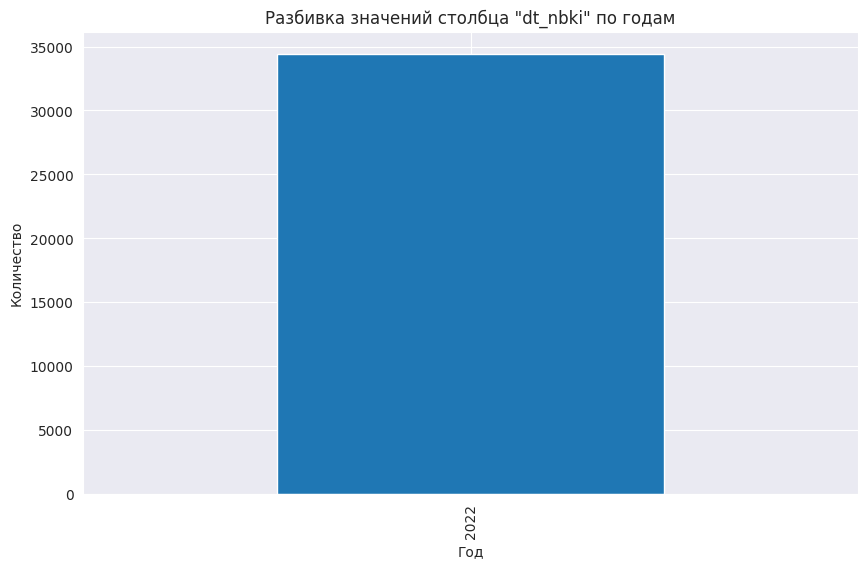

In [ ]:
# Преобразование столбца 'dt_nbki' в тип данных datetime, если он еще не является datetime
data2_2['dt_nbki'] = pd.to_datetime(data2_2['dt_nbki'])

# Разбивка значений столбца 'dt_nbki' по годам и подсчет количества
yearly_counts1 = data2_2['dt_nbki'].dt.year.value_counts()

# Сортировка по годам
yearly_counts1 = yearly_counts1.sort_index()

# Создание графика разбивки по годам
plt.figure(figsize=(10, 6))
yearly_counts1.plot(kind='bar')
plt.title('Разбивка значений столбца "dt_nbki" по годам')
plt.xlabel('Год')
plt.ylabel('Количество')
plt.show()

In [ ]:
data2_2['dt_nbki'].value_counts()

2021-08-16    4654
2020-07-15    3908
2020-09-17    3905
2021-01-29    3889
2020-11-30    3870
              ... 
2022-10-12       1
2022-11-27       1
2022-10-02       1
2022-10-10       1
2022-10-24       1
Name: dt_nbki, Length: 1071, dtype: int64

In [ ]:
data2_3 = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/Скоринг/Новая база/res_dashbrd01_2669_3class.xlsx')# таблица 3 класс

In [ ]:
data2_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550590 entries, 0 to 550589
Data columns (total 42 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   region_name                          550505 non-null  object        
 1   city_name                            550505 non-null  object        
 2   population                           550505 non-null  float64       
 3   date of birth                        550590 non-null  datetime64[ns]
 4   gender                               550590 non-null  object        
 5   education                            525413 non-null  object        
 6   position                             536226 non-null  object        
 7   dt_nbki                              550590 non-null  datetime64[ns]
 8   id_nbki                              550590 non-null  object        
 9   issued                               550497 non-null  datetime64[ns]
 

In [ ]:
data2_3 = data2_3.assign(Client_class = 2)# добавление метки класса 3

In [ ]:
data2_3 = data2_3.drop(columns=['owner_id' ,'contract_id', 'mark_kind', 'issue_dt', 'close_dt'])

In [ ]:
data2_3 = data2_3.rename(columns = {'date_of_birth':'date of birth'})

In [ ]:
data2_4 = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/Скоринг/Новая база/res_dashbrd01_2670_4class.xlsx')# таблица 4 класс

In [ ]:
data2_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 751998 entries, 0 to 751997
Data columns (total 46 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   owner_id                             751998 non-null  object        
 1   contract_id                          751998 non-null  object        
 2   mark_kind                            751998 non-null  object        
 3   issue_dt                             751998 non-null  datetime64[ns]
 4   close_dt                             0 non-null       float64       
 5   region_name                          751819 non-null  object        
 6   city_name                            751819 non-null  object        
 7   population                           751819 non-null  float64       
 8   date_of_birth                        751998 non-null  datetime64[ns]
 9   gender                               751998 non-null  object        
 

In [ ]:
data2_4 = data2_4.assign(Client_class = 3)# добавление метки класса 4

In [ ]:
data2_4 = data2_4.drop(columns=['owner_id' ,'contract_id', 'mark_kind', 'issue_dt', 'close_dt'])

In [ ]:
data2_4 = data2_4.rename(columns = {'date_of_birth':'date of birth'})

## //Объединение баз

In [ ]:
db0 = pd.concat((data, db1))# первый класс по обоим базам

In [ ]:
db0.shape

(408262, 42)

In [ ]:
db1 = pd.concat((data2, data2_2))# второй класс по обоим базам

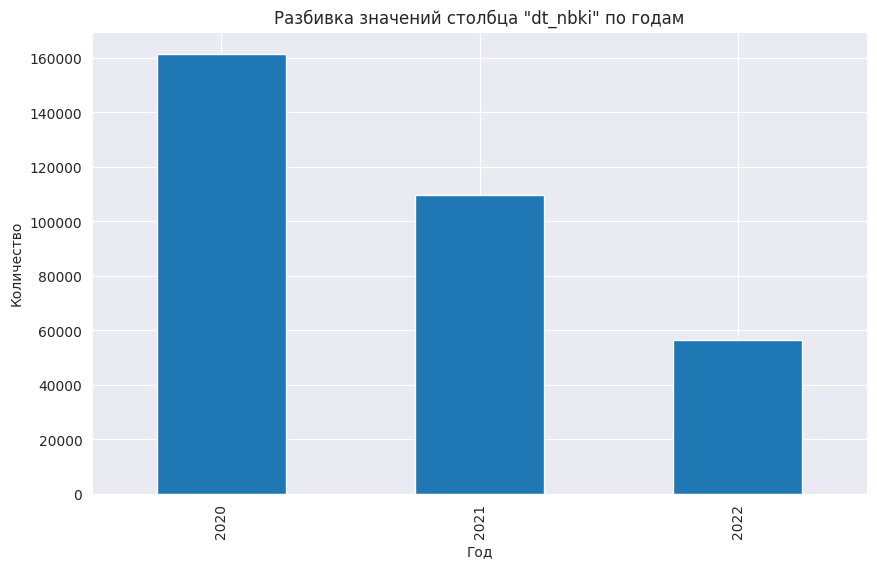

In [ ]:
# Преобразование столбца 'dt_nbki' в тип данных datetime, если он еще не является datetime
db1['dt_nbki'] = pd.to_datetime(db1['dt_nbki'])

# Разбивка значений столбца 'dt_nbki' по годам и подсчет количества
yearly_counts1 = db1['dt_nbki'].dt.year.value_counts()

# Сортировка по годам
yearly_counts1 = yearly_counts1.sort_index()

# Создание графика разбивки по годам
plt.figure(figsize=(10, 6))
yearly_counts1.plot(kind='bar')
plt.title('Разбивка значений столбца "dt_nbki" по годам')
plt.xlabel('Год')
plt.ylabel('Количество')
plt.show()

In [ ]:
db1.shape

(1376371, 43)

In [ ]:
db2 = pd.concat((data3, data2_3))# третий класс по обоим базам

In [ ]:
db2.shape

(585178, 42)

In [ ]:
db3 = pd.concat((dataB, data2_4))# четвертый класс по обоим базам

In [ ]:
db3.shape

(872741, 42)

In [ ]:
db0.to_csv(r'/content/gdrive/MyDrive/Colab Notebooks/Скоринг/db0.csv', index= False)

In [ ]:
db1.to_csv(r'/content/gdrive/MyDrive/Colab Notebooks/Скоринг/db1-1.csv', index= False)

In [ ]:
db2.to_csv(r'/content/gdrive/MyDrive/Colab Notebooks/Скоринг/db2-1.csv', index= False)

In [ ]:
db3.to_csv(r'/content/gdrive/MyDrive/Colab Notebooks/Скоринг/db3-1.csv', index= False)

## Отсекаем от 2021 года по столбцу dt_nbki

In [ ]:
#Делаем бэкап нашего набора данных как есть
db_copy_0 = db.copy()

In [ ]:

#Удаляем из набора данных кредиты до 2021 года
db = db[db['dt_nbki'].dt.year >=  2021]
db.shape

(714074, 42)

In [ ]:
db.to_csv(r'/content/gdrive/MyDrive/Colab Notebooks/Скоринг/db.csv', index= False)

In [ ]:
db = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Скоринг/db.csv')# загрузка необработанной таблицы по 4м классам со старой и новой базами

<ipython-input-5-d05a238be2b5>:1: DtypeWarning: Columns (15,31,33,37,40) have mixed types. Specify dtype option on import or set low_memory=False.
  db = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Скоринг/db.csv')# загрузка необработанной таблицы по 4м классам со старой и новой базами


##//Подключение тренировочной сбалансированной базы.

In [ ]:
db = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Скоринг/Train2_balance2.csv')

<ipython-input-5-8a9493213cf5>:1: DtypeWarning: Columns (15,31,33,37) have mixed types. Specify dtype option on import or set low_memory=False.
  db = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Скоринг/Train2_balance2.csv')


In [ ]:
#подключение вал базы
db = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Скоринг/Val2.csv')

<ipython-input-130-599741673e8b>:2: DtypeWarning: Columns (15,31,33,37,40) have mixed types. Specify dtype option on import or set low_memory=False.
  db = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Скоринг/Val2.csv')


In [ ]:
#подключение теста базы
db = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Скоринг/Test2.csv')

<ipython-input-257-594be22494f6>:2: DtypeWarning: Columns (15,31,33,37,40) have mixed types. Specify dtype option on import or set low_memory=False.
  db = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Скоринг/Test2.csv')


In [ ]:
db.shape

(137370, 42)

In [ ]:
db.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137370 entries, 0 to 137369
Data columns (total 42 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   region_name                          137319 non-null  object 
 1   city_name                            137319 non-null  object 
 2   population                           137319 non-null  float64
 3   date of birth                        137370 non-null  object 
 4   gender                               137370 non-null  object 
 5   education                            95910 non-null   object 
 6   position                             130491 non-null  object 
 7   dt_nbki                              137370 non-null  object 
 8   id_nbki                              137370 non-null  object 
 9   issued                               137235 non-null  object 
 10  amount                               137235 non-null  float64
 11  currency     

##Очистка столбцов


In [ ]:
#db = db_test

In [ ]:
db.shape

(137370, 42)

In [ ]:
db.isna().sum().sum() # количество пустых значений очень большое, нужно чистить.

693444

region_name                              0.0
city_name                                0.0
population                               0.0
date of birth                            0.0
gender                                   0.0
education                               30.0
position                                 5.0
dt_nbki                                  0.0
id_nbki                                  0.0
issued                                   0.0
amount                                   0.0
currency                                 0.0
type_credit                              0.0
status_credit                            0.0
period                                   1.0
period_interest                         73.0
psk                                      0.0
balance                                  0.0
current_indebtedness                     0.0
expired                                  0.0
days_overdue                            70.0
next_payment                             0.0
last_payme

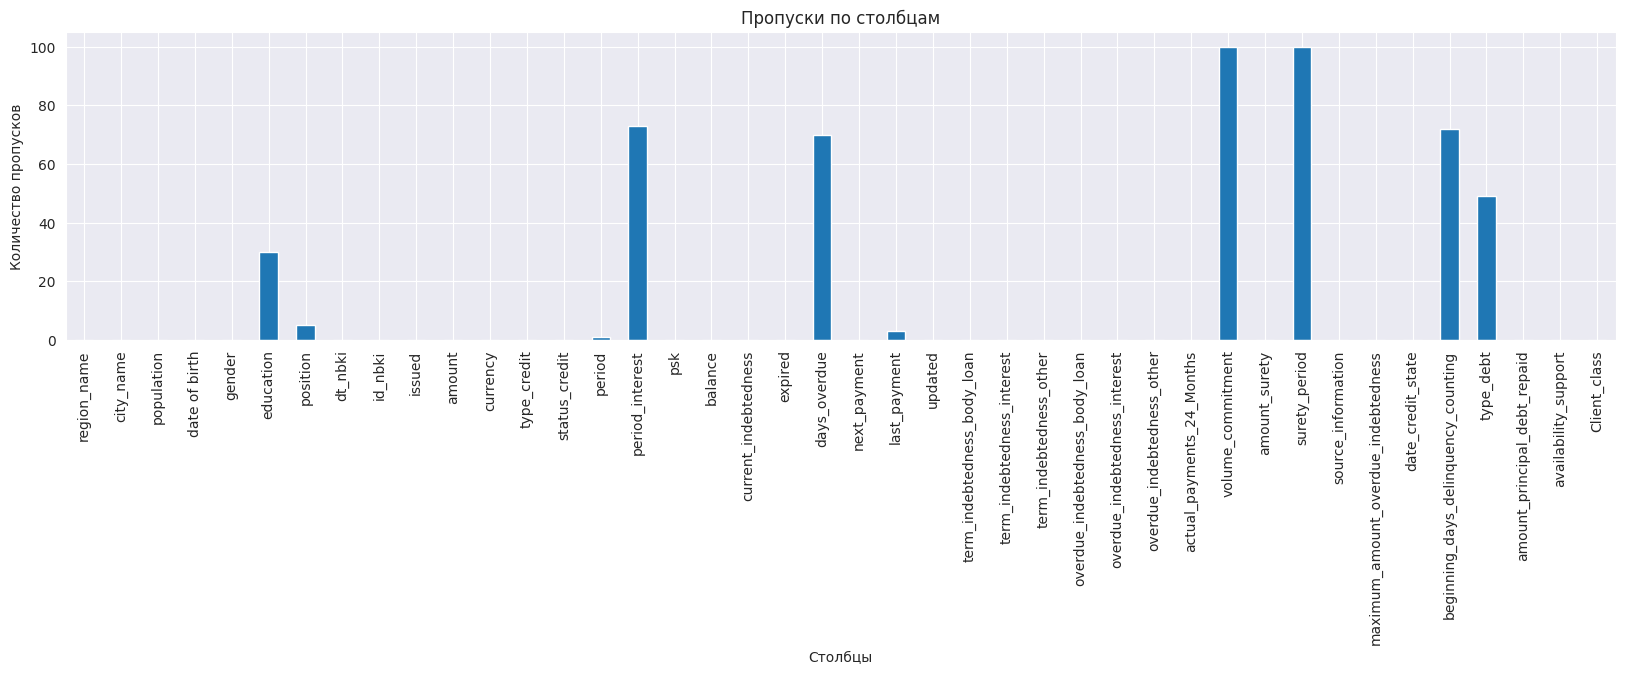

In [ ]:
missing_percentages = round(db.isnull().mean() * 100)
print(missing_percentages)

# Отрисовываем график
plt.figure(figsize=(20, 4))
missing_percentages.plot(kind='bar')
plt.title('Пропуски по столбцам')
plt.xlabel('Столбцы')
plt.ylabel('Количество пропусков')
plt.show()

In [ ]:
# Определяем столбцы с пропусками выше 40%
columns_to_drop = missing_percentages[missing_percentages > 51].index

# Удаляем выбранные столбцы из DataFrame
db = db.drop(columns=columns_to_drop)

In [ ]:
print(columns_to_drop)# удаленные столбцы с количеством пропусков более 40%

Index(['period_interest', 'days_overdue', 'volume_commitment', 'surety_period',
       'beginning_days_delinquency_counting'],
      dtype='object')


In [ ]:
db.isna().sum().sum()# количество пустых значений уменьшилось.

124180

#Перевод данных типа объект в категории

In [ ]:
obj_db = db.select_dtypes(include=['object']).copy()

In [ ]:
obj_db.dtypes

region_name             object
city_name               object
date of birth           object
gender                  object
education               object
position                object
dt_nbki                 object
id_nbki                 object
issued                  object
currency                object
type_credit             object
status_credit           object
period                  object
last_payment            object
updated                 object
source_information      object
date_credit_state       object
type_debt               object
availability_support    object
dtype: object

In [ ]:
db = db.dropna (subset=['region_name'])
db['region_name'].isnull().mean()*100

0.0

In [ ]:
db["region_name"] = db["region_name"].astype('category')
db["region_name"] = db["region_name"].cat.codes

<ipython-input-119-8c432acabd0c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db["region_name"] = db["region_name"].astype('category')
<ipython-input-119-8c432acabd0c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db["region_name"] = db["region_name"].cat.codes


In [ ]:
db['city_name'].isnull().mean()*100

0.0

In [ ]:
db["city_name"] = db["city_name"].astype('category')
db["city_name"] = db["city_name"].cat.codes

In [ ]:
db['date of birth'].isnull().mean()*100

0.0

In [ ]:
db["date of birth"] = db["date of birth"].astype('category')
db["date of birth"] = db["date of birth"].cat.codes

In [ ]:
db['gender'].isnull().mean()*100

0.0

In [ ]:
db["gender"] = db["gender"].astype('category')
db["gender"] = db["gender"].cat.codes

In [ ]:
# Пустые значения
db['education'] = db['education'].fillna('Неполное')
db['education'].isnull().mean()*100

0.0

In [ ]:
db["education"] = db["education"].astype('category')
db["education"] = db["education"].cat.codes

In [ ]:
# Пустые значения
db['position'] = db['position'].fillna('прочее')
db['position'].isnull().mean()*100

0.0

In [ ]:
db["position"] = db["position"].astype('category')
db["position"] = db["position"].cat.codes

In [ ]:
db['dt_nbki'].isnull().mean()*100

0.0

In [ ]:
db["dt_nbki"] = db["dt_nbki"].astype('category')
db["dt_nbki"] = db["dt_nbki"].cat.codes

In [ ]:
db['id_nbki'].isnull().mean()*100

0.0

In [ ]:
db["id_nbki"] = db["id_nbki"].astype('category')
db["id_nbki"] = db["id_nbki"].cat.codes

In [ ]:
db = db.dropna (subset=['issued'])
db['issued'].isnull().mean()*100

0.0

In [ ]:
db["issued"] = db["issued"].astype('category')
db["issued"] = db["issued"].cat.codes

In [ ]:
# Пустые значения
db['type_credit'] = db['type_credit'].fillna('ДругойТипКредита')
db['type_credit'].isnull().mean()*100

0.0

In [ ]:
db["type_credit"] = db["type_credit"].astype('category')
db["type_credit"] = db["type_credit"].cat.codes

In [ ]:
db = db.dropna (subset=['status_credit'])
db['status_credit'].isnull().mean()*100

0.0

In [ ]:
db["status_credit"] = db["status_credit"].astype('category')
db["status_credit"] = db["status_credit"].cat.codes

In [ ]:
db['period'] = db['period'].fillna('2100-01-01')
db['period'].isnull().mean()*100

0.0

In [ ]:
db["period"] = db["period"].astype('category')
db["period"] = db["period"].cat.codes

In [ ]:
# Пустые значения
db['last_payment'] = db['last_payment'].fillna('2017-01-01')
db['last_payment'].isnull().mean()*100

0.0

In [ ]:
db["last_payment"] = db["last_payment"].astype('category')
db["last_payment"] = db["last_payment"].cat.codes

In [ ]:
db['updated'].isnull().mean()*100

0.0

In [ ]:
db["updated"] = db["updated"].astype('category')
db["updated"] = db["updated"].cat.codes

In [ ]:
db['source_information'].isnull().mean()*100

0.0

In [ ]:
db["source_information"] = db["source_information"].astype('category')
db["source_information"] = db["source_information"].cat.codes

In [ ]:
db = db.dropna (subset=['date_credit_state'])
db['date_credit_state'].isnull().mean()*100

0.0

In [ ]:
db["date_credit_state"] = db["date_credit_state"].astype('category')
db["date_credit_state"] = db["date_credit_state"].cat.codes

In [ ]:
db['availability_support'].isnull().mean()*100

0.0

In [ ]:
db["availability_support"] = db["availability_support"].astype('category')
db["availability_support"] = db["availability_support"].cat.codes

In [ ]:
db["type_debt"] = db["type_debt"].astype('category')
db["type_debt"] = db["type_debt"].cat.codes

In [ ]:
db = db.drop(columns='currency')#удаление столбца валюта

In [ ]:
cat_db = db.select_dtypes(include=['category']).copy()

In [ ]:
db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138994 entries, 0 to 139220
Data columns (total 36 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   region_name                          138994 non-null  int8   
 1   city_name                            138994 non-null  int16  
 2   population                           138994 non-null  float64
 3   date of birth                        138994 non-null  int16  
 4   gender                               138994 non-null  int8   
 5   education                            138994 non-null  int8   
 6   position                             138994 non-null  int8   
 7   dt_nbki                              138994 non-null  int16  
 8   id_nbki                              138994 non-null  int16  
 9   issued                               138994 non-null  int16  
 10  amount                               138994 non-null  float64
 11  type_credit  

In [ ]:
db.to_csv('/content/gdrive/MyDrive/Colab Notebooks/Скоринг/db_4bal_cat_cl.csv', index=False)

# Кодировка котегориальных переменных

## date of birth

Из колонки дата рождения получим возраст, саму колонку др удалим date of birth -> age

In [ ]:
from datetime import datetime
today = datetime.today()
db['date of birth'] = pd.to_datetime(db['date of birth'])
db['age'] = db['date of birth'].apply(
               lambda x: today.year - x.year -
               ((today.month, today.day) < (x.month, x.day))
               )

In [ ]:
db = db.drop(columns='date of birth')

In [ ]:
db.head(5)

,region_name,city_name,population,gender,education,position,dt_nbki,id_nbki,issued,amount,...,actual_payments_24_Months,amount_surety,source_information,maximum_amount_overdue_indebtedness,date_credit_state,type_debt,amount_principal_debt_repaid,availability_support,Client_class,age
0,Архангельская область,г. Северодвинск,182291.0,Женский,NaN,руководитель,2023-04-20,41d25c4b-df4a-11ed-b80d-3cfdfed12971,2015-08-24,0.0,...,0.0,0.0,Банк,0.0,2020-04-08,NaN,100362.33,0.0,0,30
1,Архангельская область,г. Северодвинск,182291.0,Женский,NaN,руководитель,2023-04-20,41d25c4b-df4a-11ed-b80d-3cfdfed12971,2015-08-28,0.0,...,0.0,0.0,Банк,0.0,2019-09-26,NaN,256437.55,0.0,0,30
2,Архангельская область,г. Северодвинск,182291.0,Женский,NaN,руководитель,2023-04-20,41d25c4b-df4a-11ed-b80d-3cfdfed12971,2016-05-14,50000.0,...,0.0,0.0,МФО,0.0,2017-01-20,NaN,50000.00,0.0,0,30
3,Архангельская область,г. Северодвинск,182291.0,Женский,NaN,руководитель,2023-04-20,41d25c4b-df4a-11ed-b80d-3cfdfed12971,2016-05-14,17500.0,...,0.0,0.0,МФО,0.0,2017-04-25,NaN,17500.00,0.0,0,30
4,Архангельская область,г. Северодвинск,182291.0,Женский,NaN,руководитель,2023-04-20,41d25c4b-df4a-11ed-b80d-3cfdfed12971,2016-06-10,20000.0,...,0.0,0.0,МФО,0.0,2016-07-16,NaN,20000.00,0.0,0,30


In [ ]:
#db[db['age'].isnull() == True]# нет пропущенных значений в столбце возраст

In [ ]:
db['age'].isnull().mean()*100 # нет пропущенных значений в столбце возраст

0.0

In [ ]:
dFilter = db.query('age<18')#нет людей младше 18
dFilter.head(5)

,region_name,city_name,population,gender,education,position,dt_nbki,id_nbki,issued,amount,...,actual_payments_24_Months,amount_surety,source_information,maximum_amount_overdue_indebtedness,date_credit_state,type_debt,amount_principal_debt_repaid,availability_support,Client_class,age


In [ ]:
# Подсчет количества уникальных значений
age_counts = db['age'].value_counts()

# Вычисление процентного соотношения
age_percentages = round((age_counts / age_counts.sum()) * 100, 3)

# Вывод результатов
print(age_percentages)
age_percentages.info()

43    4.013
44    3.477
34    3.206
38    3.116
35    3.086
      ...  
19    0.115
79    0.072
77    0.047
18    0.046
80    0.013
Name: age, Length: 63, dtype: float64
<class 'pandas.core.series.Series'>
Int64Index: 63 entries, 43 to 80
Series name: age
Non-Null Count  Dtype  
--------------  -----  
63 non-null     float64
dtypes: float64(1)
memory usage: 1008.0 bytes


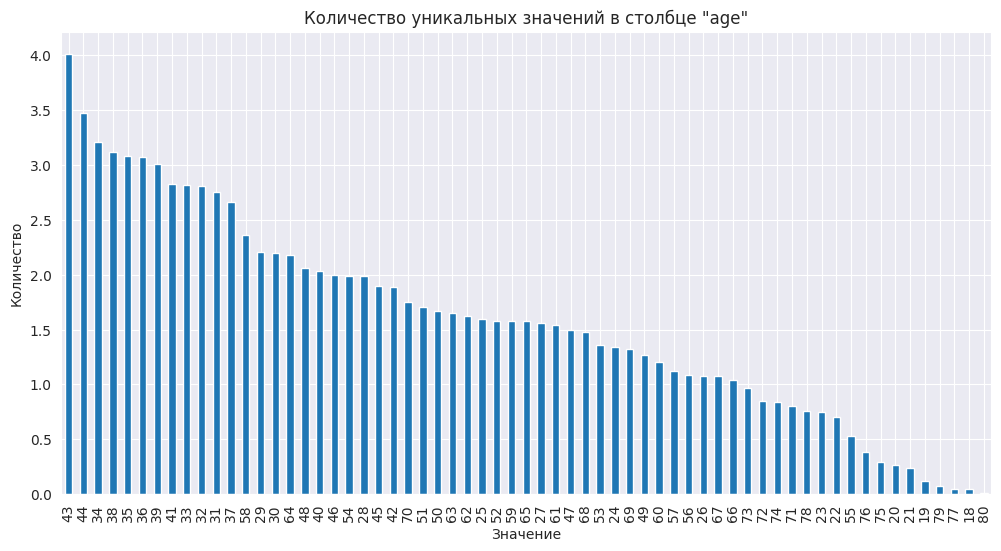

In [ ]:
# Создание графика
plt.figure(figsize=(12, 6))
age_percentages.plot(kind='bar', stacked=True)
plt.title('Количество уникальных значений в столбце "age"')
plt.xlabel('Значение')
plt.ylabel('Количество')
plt.show()

## education

In [ ]:
db['education'].unique()

array(['СреднеТехническое', 'Высшее', 'Среднее', 'НеполноеВысшее', nan,
       'НеполноеСреднее', 'НесколькоВысших'], dtype=object)

In [ ]:
db['education'].value_counts()

СреднеТехническое    36049
Среднее              33746
Высшее               20292
НеполноеВысшее        2979
НеполноеСреднее       2538
НесколькоВысших        306
Name: education, dtype: int64

In [ ]:
# Подсчет количества уникальных значений
education_counts = db['education'].value_counts()

# Вычисление процентного соотношения
education_percentages = round((education_counts / education_counts.sum()) * 100, 3)

# Вывод результатов
print(education_percentages)

СреднеТехническое    37.586
Среднее              35.185
Высшее               21.157
НеполноеВысшее        3.106
НеполноеСреднее       2.646
НесколькоВысших       0.319
Name: education, dtype: float64


In [ ]:
# Создаем словарь с соответствиями значений для замены
replace_dict = {
    'СреднеТехническое': 'Среднее',
    'НесколькоВысших': 'Высшее',
    'НеполноеВысшее': 'Неполное',
    'НеполноеСреднее': 'Неполное',
    'УченаяСтепень': 'Высшее'
}

 #Заменяем значения в столбце 'education' с использованием словаря замены
db['education'] = db['education'].replace(replace_dict)

In [ ]:
# Подсчет количества уникальных значений
education_counts = db['education'].value_counts()

# Вычисление процентного соотношения
education_percentages = round((education_counts / education_counts.sum()) * 100, 3)

# Вывод результатов
print(education_percentages)

Среднее     72.771
Высшее      21.476
Неполное     5.752
Name: education, dtype: float64


In [ ]:
# Пустые значения
db['education'] = db['education'].fillna('Неполное')
db['education'].isnull().mean()*100

0.0

In [ ]:
# Подсчет количества уникальных значений
education_counts = db['education'].value_counts()

# Вычисление процентного соотношения
education_percentages = round((education_counts / education_counts.sum()) * 100, 3)

# Вывод результатов
print(education_percentages)

Среднее     50.808
Неполное    34.197
Высшее      14.995
Name: education, dtype: float64


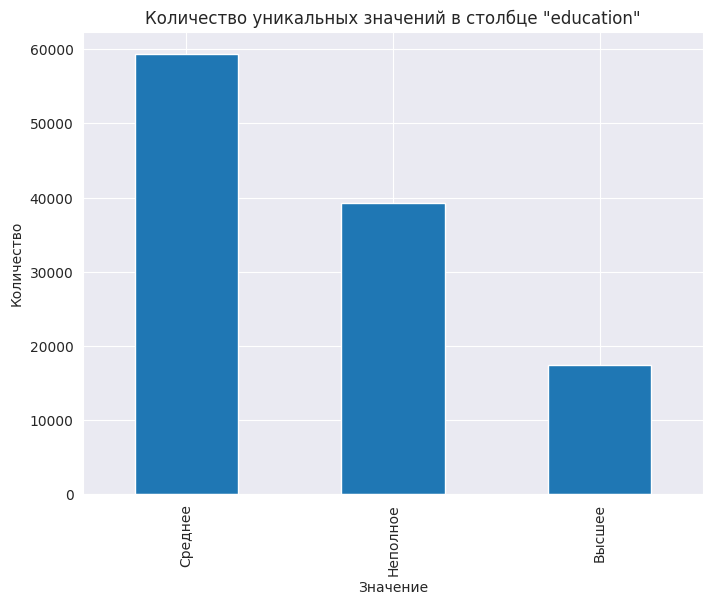

In [ ]:
# Создание графика
plt.figure(figsize=(8, 6))
education_counts.plot(kind='bar')
plt.title('Количество уникальных значений в столбце "education"')
plt.xlabel('Значение')
plt.ylabel('Количество')
plt.show()

In [ ]:
from sklearn import preprocessing  # кодировка переменной
db_copy=db.copy()


my_label = preprocessing.LabelEncoder()

db['education']= my_label.fit_transform(db['education'])
print(db['education'].unique())
print("Data Frame after Label Encoding:\n")
db.head(5)





[2 0 1]
Data Frame after Label Encoding:



,region_name,city_name,population,gender,education,position,dt_nbki,id_nbki,issued,amount,...,actual_payments_24_Months,amount_surety,source_information,maximum_amount_overdue_indebtedness,date_credit_state,type_debt,amount_principal_debt_repaid,availability_support,Client_class,age
0,Нижегородская область,г. Чкаловск,11601.0,Мужской,2,сотрудники крупного бизнеса,2023-03-04,fb3f3545-babd-11ed-80cf-f4034344a6bd,2017-03-08,22648.00,...,0.0,0.0,МФО,0.0,2017-05-10,NaN,22648.00,0.0,0,33
1,Нижегородская область,г. Чкаловск,11601.0,Мужской,2,сотрудники крупного бизнеса,2023-03-04,fb3f3545-babd-11ed-80cf-f4034344a6bd,2018-05-09,6000.00,...,0.0,0.0,Банк,0.0,2019-04-03,NaN,9513.81,0.0,0,33
2,Нижегородская область,г. Чкаловск,11601.0,Мужской,2,сотрудники крупного бизнеса,2023-03-04,fb3f3545-babd-11ed-80cf-f4034344a6bd,2018-09-03,48888.70,...,0.0,0.0,Банк,0.0,2023-02-17,NaN,95245.21,0.0,0,33
3,Нижегородская область,г. Чкаловск,11601.0,Мужской,2,сотрудники крупного бизнеса,2023-03-04,fb3f3545-babd-11ed-80cf-f4034344a6bd,2019-02-15,302100.00,...,0.0,0.0,Банк,0.0,2022-05-12,NaN,302100.00,1.0,0,33
4,Нижегородская область,г. Чкаловск,11601.0,Мужской,2,сотрудники крупного бизнеса,2023-03-04,fb3f3545-babd-11ed-80cf-f4034344a6bd,2021-02-08,28612.73,...,0.0,0.0,Банк,0.0,2021-08-18,NaN,28612.73,0.0,0,33


## position

In [ ]:
db['position'].unique()

array(['сотрудники крупного бизнеса', 'военнослужащий', 'рабочий',
       'технический специалист', 'пенсионер', 'самозанятый',
       'работник социальной сферы', 'муниципальный служащий',
       'специалист', 'руководитель', 'госслужащий',
       'судебная власть, права человека', 'сотрудник малого бизнеса',
       'работник промышленных предприятий',
       'индивидуальный предприниматель (ип)', nan,
       'работник бюджетной сферы',
       'сотрудник градообразующего предприятия', 'прочее', 'работник с/х'],
      dtype=object)

In [ ]:
db['position'].value_counts()

пенсионер                                 37026
рабочий                                   21176
сотрудник малого бизнеса                  16059
специалист                                13724
сотрудники крупного бизнеса                7323
работник бюджетной сферы                   5029
работник промышленных предприятий          4638
госслужащий                                4376
прочее                                     3939
индивидуальный предприниматель (ип)        3668
руководитель                               3375
муниципальный служащий                     2357
работник с/х                               1861
самозанятый                                1791
военнослужащий                             1705
работник социальной сферы                  1319
сотрудник градообразующего предприятия      688
технический специалист                      318
судебная власть, права человека             119
Name: position, dtype: int64

In [ ]:
# Подсчет количества уникальных значений
position_counts = db['position'].value_counts()

# Вычисление процентного соотношения
position_percentages = round((position_counts / position_counts.sum()) * 100, 3)

# Вывод результатов
position_percentages

пенсионер                                 28.374
рабочий                                   16.228
сотрудник малого бизнеса                  12.307
специалист                                10.517
сотрудники крупного бизнеса                5.612
работник бюджетной сферы                   3.854
работник промышленных предприятий          3.554
госслужащий                                3.353
прочее                                     3.019
индивидуальный предприниматель (ип)        2.811
руководитель                               2.586
муниципальный служащий                     1.806
работник с/х                               1.426
самозанятый                                1.373
военнослужащий                             1.307
работник социальной сферы                  1.011
сотрудник градообразующего предприятия     0.527
технический специалист                     0.244
судебная власть, права человека            0.091
Name: position, dtype: float64

In [ ]:
# Создаем словарь с соответствиями значений для замены
replace_dict1 = {
    'государственные служащие высоких чинов': 'работник бюджетной сферы',
    'судебная власть, права человека': 'госслужащий',
    'технический специалист': 'специалист',
    'работник социальной сферы': 'прочее',
    'работник с/х': 'прочее',
    'сотрудник градообразующего предприятия': 'рабочий',
    'муниципальный служащий': 'работник бюджетной сферы',
    'госслужащий': 'работник бюджетной сферы',
    'военнослужащий': 'прочее',
    'руководитель': 'специалист',
    'самозанятый': 'прочее',
    'муниципальный служащий': 'работник бюджетной сферы',
    'разнорабочий': 'рабочий',
    'сварщик': 'рабочий',
    'водитель': 'рабочий',
}

# Заменяем значения в столбце 'position' с использованием словаря замены
db['position'] = db['position'].replace(replace_dict1)

In [ ]:
# Подсчет количества уникальных значений
position_counts = db['position'].value_counts()

# Вычисление процентного соотношения
position_percentages = round((position_counts / position_counts.sum()) * 100, 3)

# Вывод результатов
position_percentages

пенсионер                              28.374
рабочий                                16.755
специалист                             13.347
сотрудник малого бизнеса               12.307
работник бюджетной сферы                9.105
прочее                                  8.135
сотрудники крупного бизнеса             5.612
работник промышленных предприятий       3.554
индивидуальный предприниматель (ип)     2.811
Name: position, dtype: float64

In [ ]:
# Пустые значения
db['position'] = db['position'].fillna('прочее')
db['position'].isnull().mean()*100

0.0

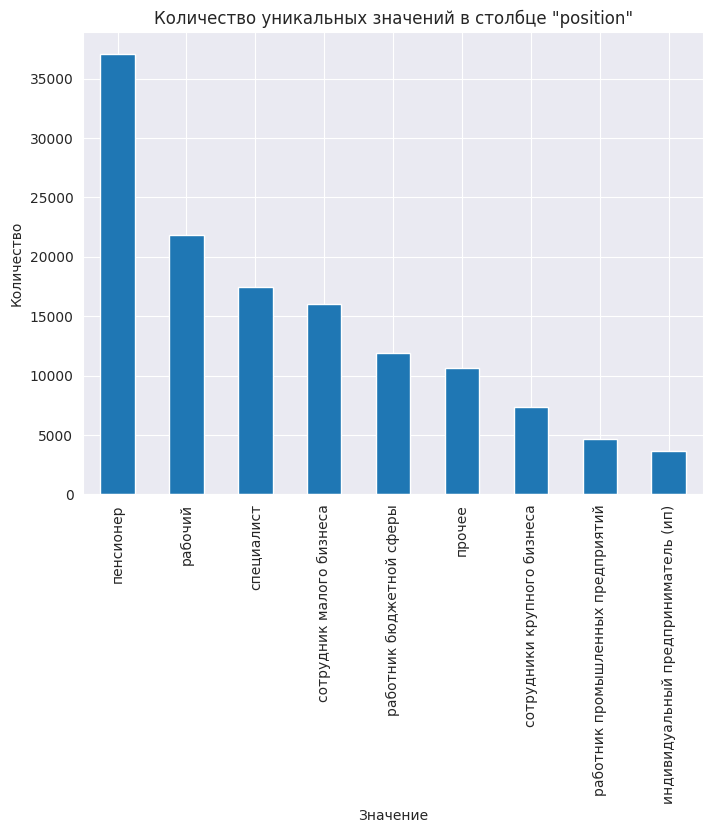

In [ ]:
# Создание графика
plt.figure(figsize=(8, 6))
position_counts.plot(kind='bar')
plt.title('Количество уникальных значений в столбце "position"')
plt.xlabel('Значение')
plt.ylabel('Количество')
plt.show()

In [ ]:
db['position']= my_label.fit_transform(db['position']) # кодировка переменной
print(db['position'].unique())
print("Data Frame after Label Encoding:\n")
db.head(5)

[7 2 5 8 1 3 6 4 0]
Data Frame after Label Encoding:



,region_name,city_name,population,gender,education,position,dt_nbki,id_nbki,issued,amount,...,actual_payments_24_Months,amount_surety,source_information,maximum_amount_overdue_indebtedness,date_credit_state,type_debt,amount_principal_debt_repaid,availability_support,Client_class,age
0,Нижегородская область,г. Чкаловск,11601.0,Мужской,2,7,2023-03-04,fb3f3545-babd-11ed-80cf-f4034344a6bd,2017-03-08,22648.00,...,0.0,0.0,МФО,0.0,2017-05-10,NaN,22648.00,0.0,0,33
1,Нижегородская область,г. Чкаловск,11601.0,Мужской,2,7,2023-03-04,fb3f3545-babd-11ed-80cf-f4034344a6bd,2018-05-09,6000.00,...,0.0,0.0,Банк,0.0,2019-04-03,NaN,9513.81,0.0,0,33
2,Нижегородская область,г. Чкаловск,11601.0,Мужской,2,7,2023-03-04,fb3f3545-babd-11ed-80cf-f4034344a6bd,2018-09-03,48888.70,...,0.0,0.0,Банк,0.0,2023-02-17,NaN,95245.21,0.0,0,33
3,Нижегородская область,г. Чкаловск,11601.0,Мужской,2,7,2023-03-04,fb3f3545-babd-11ed-80cf-f4034344a6bd,2019-02-15,302100.00,...,0.0,0.0,Банк,0.0,2022-05-12,NaN,302100.00,1.0,0,33
4,Нижегородская область,г. Чкаловск,11601.0,Мужской,2,7,2023-03-04,fb3f3545-babd-11ed-80cf-f4034344a6bd,2021-02-08,28612.73,...,0.0,0.0,Банк,0.0,2021-08-18,NaN,28612.73,0.0,0,33


## gender

In [ ]:
db['gender'].unique()

array(['Мужской', 'Женский'], dtype=object)

In [ ]:
# Подсчет количества уникальных значений
gender_counts = db['gender'].value_counts()

# Вычисление процентного соотношения
gender_percentages = round((gender_counts / gender_counts.sum()) * 100, 3)

# Вывод результатов
gender_percentages

Женский    62.18
Мужской    37.82
Name: gender, dtype: float64

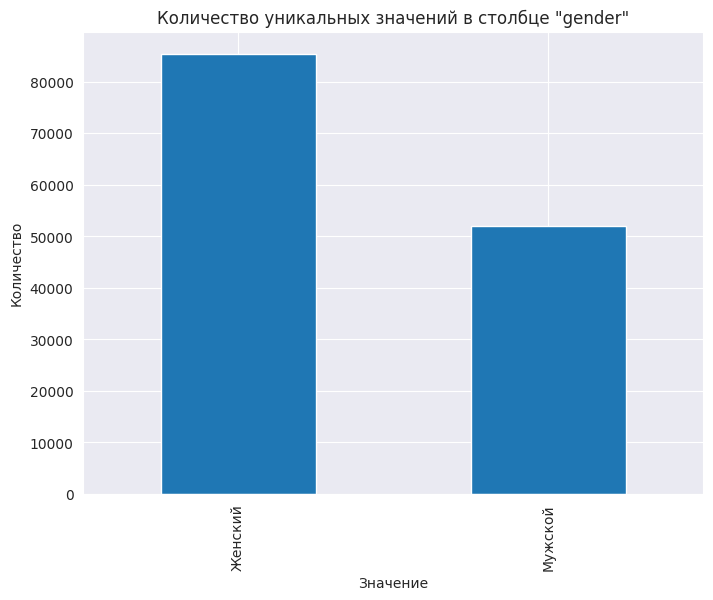

In [ ]:
# Создание графика
plt.figure(figsize=(8, 6))
gender_counts.plot(kind='bar')
plt.title('Количество уникальных значений в столбце "gender"')
plt.xlabel('Значение')
plt.ylabel('Количество')
plt.show()

In [ ]:
db['gender']= my_label.fit_transform(db['gender'])  # кодировка переменной
print(db['gender'].unique())
print("Data Frame after Label Encoding:\n")
db.head(5)

[1 0]
Data Frame after Label Encoding:



,region_name,city_name,population,gender,education,position,dt_nbki,id_nbki,issued,amount,...,actual_payments_24_Months,amount_surety,source_information,maximum_amount_overdue_indebtedness,date_credit_state,type_debt,amount_principal_debt_repaid,availability_support,Client_class,age
0,Нижегородская область,г. Чкаловск,11601.0,1,2,7,2023-03-04,fb3f3545-babd-11ed-80cf-f4034344a6bd,2017-03-08,22648.00,...,0.0,0.0,МФО,0.0,2017-05-10,NaN,22648.00,0.0,0,33
1,Нижегородская область,г. Чкаловск,11601.0,1,2,7,2023-03-04,fb3f3545-babd-11ed-80cf-f4034344a6bd,2018-05-09,6000.00,...,0.0,0.0,Банк,0.0,2019-04-03,NaN,9513.81,0.0,0,33
2,Нижегородская область,г. Чкаловск,11601.0,1,2,7,2023-03-04,fb3f3545-babd-11ed-80cf-f4034344a6bd,2018-09-03,48888.70,...,0.0,0.0,Банк,0.0,2023-02-17,NaN,95245.21,0.0,0,33
3,Нижегородская область,г. Чкаловск,11601.0,1,2,7,2023-03-04,fb3f3545-babd-11ed-80cf-f4034344a6bd,2019-02-15,302100.00,...,0.0,0.0,Банк,0.0,2022-05-12,NaN,302100.00,1.0,0,33
4,Нижегородская область,г. Чкаловск,11601.0,1,2,7,2023-03-04,fb3f3545-babd-11ed-80cf-f4034344a6bd,2021-02-08,28612.73,...,0.0,0.0,Банк,0.0,2021-08-18,NaN,28612.73,0.0,0,33


## удаление currency

In [ ]:
db = db.loc[db['currency'] == 'RUB']#удаление строк не рублевых кредитов

In [ ]:
db['currency'].unique()

array(['RUB'], dtype=object)

In [ ]:
db = db.drop(columns='currency')#удаление столбца валюта

In [ ]:
db.head(5)

,region_name,city_name,population,gender,education,position,dt_nbki,id_nbki,issued,amount,...,actual_payments_24_Months,amount_surety,source_information,maximum_amount_overdue_indebtedness,date_credit_state,type_debt,amount_principal_debt_repaid,availability_support,Client_class,age
0,Нижегородская область,г. Чкаловск,11601.0,1,2,7,2023-03-04,fb3f3545-babd-11ed-80cf-f4034344a6bd,2017-03-08,22648.00,...,0.0,0.0,МФО,0.0,2017-05-10,NaN,22648.00,0.0,0,33
1,Нижегородская область,г. Чкаловск,11601.0,1,2,7,2023-03-04,fb3f3545-babd-11ed-80cf-f4034344a6bd,2018-05-09,6000.00,...,0.0,0.0,Банк,0.0,2019-04-03,NaN,9513.81,0.0,0,33
2,Нижегородская область,г. Чкаловск,11601.0,1,2,7,2023-03-04,fb3f3545-babd-11ed-80cf-f4034344a6bd,2018-09-03,48888.70,...,0.0,0.0,Банк,0.0,2023-02-17,NaN,95245.21,0.0,0,33
3,Нижегородская область,г. Чкаловск,11601.0,1,2,7,2023-03-04,fb3f3545-babd-11ed-80cf-f4034344a6bd,2019-02-15,302100.00,...,0.0,0.0,Банк,0.0,2022-05-12,NaN,302100.00,1.0,0,33
4,Нижегородская область,г. Чкаловск,11601.0,1,2,7,2023-03-04,fb3f3545-babd-11ed-80cf-f4034344a6bd,2021-02-08,28612.73,...,0.0,0.0,Банк,0.0,2021-08-18,NaN,28612.73,0.0,0,33


##type_credit

In [ ]:
db['type_credit'].unique()

array(['Микрокредит', 'КредитнаяКарта', 'Овердрафт', 'КредитНаАвтомобиль',
       'Потребительский', 'ДругойТипКредита', nan, 'Ипотека',
       'КредитНаличнымиНецелевой', 'ДоговорПоручительства',
       'ДебетоваяКартаСОвердрафтом', 'НаРазвитиеБизнеса',
       'БанковскаяГарантия', 'НаПополнениеОборотныхСредств', 'НаОбучение',
       'PDLЗайм', 'ИпотекаПервичныйРынок', 'ИпотекаВторичныйРынок',
       'НаСтроительство'], dtype=object)

In [ ]:
db['type_credit'].value_counts()

Микрокредит                     108256
Потребительский                  16478
КредитнаяКарта                    9310
ДругойТипКредита                  1084
Овердрафт                          739
КредитНаличнымиНецелевой           675
КредитНаАвтомобиль                 226
Ипотека                            172
ДебетоваяКартаСОвердрафтом         113
PDLЗайм                             41
НаРазвитиеБизнеса                   33
ДоговорПоручительства               15
НаПополнениеОборотныхСредств        14
БанковскаяГарантия                   8
ИпотекаВторичныйРынок                4
НаОбучение                           1
ИпотекаПервичныйРынок                1
НаСтроительство                      1
Name: type_credit, dtype: int64

In [ ]:
# Подсчет количества уникальных значений
type_credit_counts = db['type_credit'].value_counts()

# Вычисление процентного соотношения
type_credit_percentages = round((type_credit_counts / type_credit_counts.sum()) * 100, 3)

# Вывод результатов
type_credit_percentages

Микрокредит                     78.920
Потребительский                 12.013
КредитнаяКарта                   6.787
ДругойТипКредита                 0.790
Овердрафт                        0.539
КредитНаличнымиНецелевой         0.492
КредитНаАвтомобиль               0.165
Ипотека                          0.125
ДебетоваяКартаСОвердрафтом       0.082
PDLЗайм                          0.030
НаРазвитиеБизнеса                0.024
ДоговорПоручительства            0.011
НаПополнениеОборотныхСредств     0.010
БанковскаяГарантия               0.006
ИпотекаВторичныйРынок            0.003
НаОбучение                       0.001
ИпотекаПервичныйРынок            0.001
НаСтроительство                  0.001
Name: type_credit, dtype: float64

In [ ]:
# Создаем словарь с соответствиями значений для замены
replace_dict2 = {
    'ИпотекаПервичныйРынок': 'ДругойТипКредита',
    'ИпотекаЛомбардныйКредит': 'ДругойТипКредита',
    'ИпотекаВторичныйРынок': 'ДругойТипКредита',
    'НаОбучение': 'ДругойТипКредита',
    'НаСтроительство': 'ДругойТипКредита',
    'БанковскаяГарантия': 'ДругойТипКредита',
    'PDLЗайм': 'ДругойТипКредита',
    'ДоговорПоручительства': 'ДругойТипКредита',
    'НаРазвитиеБизнеса': 'ДругойТипКредита',
    'НаПополнениеОборотныхСредств': 'ДругойТипКредита',
    'ДебетоваяКартаСОвердрафтом': 'ДругойТипКредита',
    'КредитНаличнымиНецелевой': 'ДругойТипКредита',
    'КредитНаАвтомобиль': 'ДругойТипКредита',
    'Овердрафт': 'ДругойТипКредита',
    'НаПокупкуОборудования': 'ДругойТипКредита',
    'Ипотека': 'ДругойТипКредита',
    'Потребительский': 'ДругойТипКредита',
    'КредитнаяКарта': 'ДругойТипКредита'
}

# Заменяем значения в столбце 'type_credit' с использованием словаря замены
db['type_credit'] = db['type_credit'].replace(replace_dict2)

In [ ]:
# Пустые значения
db['type_credit'] = db['type_credit'].fillna('ДругойТипКредита')
db['type_credit'].isnull().mean()*100

0.0

In [ ]:
# Подсчет количества уникальных значений
type_credit_counts = db['type_credit'].value_counts()

# Вычисление процентного соотношения
type_credit_percentages = round((type_credit_counts / type_credit_counts.sum()) * 100, 3)

# Вывод результатов
type_credit_percentages

Микрокредит         78.843
ДругойТипКредита    21.157
Name: type_credit, dtype: float64

In [ ]:
db['type_credit']= my_label.fit_transform(db['type_credit'])  # кодировка переменной
print(db['type_credit'].unique())
print("Data Frame after Label Encoding:\n")
db.head(5)

[1 0]
Data Frame after Label Encoding:



,region_name,city_name,population,gender,education,position,dt_nbki,id_nbki,issued,amount,...,actual_payments_24_Months,amount_surety,source_information,maximum_amount_overdue_indebtedness,date_credit_state,type_debt,amount_principal_debt_repaid,availability_support,Client_class,age
0,Нижегородская область,г. Чкаловск,11601.0,1,2,7,2023-03-04,fb3f3545-babd-11ed-80cf-f4034344a6bd,2017-03-08,22648.00,...,0.0,0.0,МФО,0.0,2017-05-10,NaN,22648.00,0.0,0,33
1,Нижегородская область,г. Чкаловск,11601.0,1,2,7,2023-03-04,fb3f3545-babd-11ed-80cf-f4034344a6bd,2018-05-09,6000.00,...,0.0,0.0,Банк,0.0,2019-04-03,NaN,9513.81,0.0,0,33
2,Нижегородская область,г. Чкаловск,11601.0,1,2,7,2023-03-04,fb3f3545-babd-11ed-80cf-f4034344a6bd,2018-09-03,48888.70,...,0.0,0.0,Банк,0.0,2023-02-17,NaN,95245.21,0.0,0,33
3,Нижегородская область,г. Чкаловск,11601.0,1,2,7,2023-03-04,fb3f3545-babd-11ed-80cf-f4034344a6bd,2019-02-15,302100.00,...,0.0,0.0,Банк,0.0,2022-05-12,NaN,302100.00,1.0,0,33
4,Нижегородская область,г. Чкаловск,11601.0,1,2,7,2023-03-04,fb3f3545-babd-11ed-80cf-f4034344a6bd,2021-02-08,28612.73,...,0.0,0.0,Банк,0.0,2021-08-18,NaN,28612.73,0.0,0,33


## region_name

In [ ]:
db['region_name'].unique()

array(['Нижегородская область', 'Иркутская область',
       'Свердловская область', 'Ставропольский край', 'Липецкая область',
       'Мурманская область', 'Краснодарский край', 'Саратовская область',
       'Рязанская область', 'Вологодская область',
       'Башкортостан республика', 'Тюменская область',
       'Ленинградская область', 'Московская область',
       'Архангельская область', 'Белгородская область',
       'Забайкальский край', 'Кировская область', 'Челябинская область',
       'Крым республика', 'Пензенская область', 'Пермский край',
       'Алтайский край', 'Ивановская область', 'Северная Осетия',
       'Курганская область', 'Кемеровская область', 'Ульяновская область',
       'Карелия республика', 'Приморский край', 'Тверская область',
       'Владимирская область', 'Тульская область', 'Брянская область',
       'Калининградская область', 'Ростовская область',
       'Астраханская область', 'Новосибирская область',
       'Оренбургская область', 'Калужская область', '

In [ ]:
db = db.drop(columns='region_name')#удаление столбца region_name

In [ ]:
#db['region_name'].value_counts()

In [ ]:
db = db.dropna (subset=['region_name'])#удаление строк с пустым регионом

KeyError: ignored

In [ ]:
db['region_name']= my_label.fit_transform(db['region_name'])  # кодировка переменной
print(db['region_name'].unique())
print("Data Frame after Label Encoding:\n")
db.head(5)

## city_name

In [ ]:
db['city_name'].unique()

array(['г. Чкаловск', 'г. Ангарск', 'г.  Зима', 'г. Первоуральск',
       'г. Навашино', 'г.  Светлоград', 'г. Липецк', 'г. Оленегорск',
       'г. Полтавская', 'г.  Пугачев', 'г.Сасово', 'г. Сокол',
       'г. Октябрьский', 'г.  Ишим', 'г.Каменск-Уральский', 'г. Колпино',
       'г.Лобня', 'г. Северодвинск', 'г.Волоконовка', 'г.  Хилок',
       'г. Котельнич', 'г. Катав-Ивановск', 'г. Вологда', 'г.Симферополь',
       'г. Невинномысск', 'г. Краснотурьинск', 'г. Каменка',
       'г. Березники', 'г. Тальменка', 'г.  Сергиев Посад', 'г. Южа',
       'г.  Владикавказ', 'г. Верхняя Салда', 'г.  Курган',
       'г. Брюховецкая', 'г. Чусовой', 'г.  Ленинск-Кузнецкий',
       'г. Димитровград', 'г. Петрозаводск', 'г. Архангельск',
       'г.  Ирбит', 'г.Дальнереченск', 'г.Давлеканово',
       'г.  Краснобродский', 'г.  Калязин', 'г.  Горнозаводск',
       'г. Родники', 'г. Камешково', 'г. Энгельс', 'г. Товарковский',
       'г. Старый Оскол', 'г.Пенза', 'г. Тейково', 'г. Клетня',
       'г. С

In [ ]:
db['city_name'].value_counts()

г. Северодвинск     43417
г. Липецк            1282
г.Жуковка             967
г.  Владикавказ       795
г. Краснодар          782
                    ...  
г.  Агидель             2
г.  Агрыз               2
пгт.Новый Торъял        1
г. Кшенский             1
г. Юрга                 1
Name: city_name, Length: 747, dtype: int64

In [ ]:
db['population'].value_counts()

182291.0    43417
509420.0     1282
17037.0       967
306258.0      795
853848.0      782
            ...  
17368.0         2
25306.0         2
81733.0         1
5622.0          1
5966.0          1
Name: population, Length: 743, dtype: int64

Столбец population дублирует по распределению значений city_name с небольшим количеством пропусков. Удаляем city_name и строки с пропусками в population

In [ ]:
db = db.drop(columns='city_name')

In [ ]:
db = db.dropna (subset=['population'])#удаление строк с пустым population


## Copy

In [ ]:
db_copy = db.copy()

In [ ]:
#db = db_copy

## status_credit

In [ ]:
db['status_credit'].unique()

array(['СчетЗакрыт', 'Активный',
       'ПереданНаОбслуживаниеВДругуюОрганизацию', 'Просрочен',
       'ПередачаДанныхПрекращена', nan, 'СписанСБаланса', 'Банкротство',
       'ПроблемыСВозвратом', 'Рефинансирован', 'Спор',
       'ОплаченЗаСчетОбеспечения', 'ПринудительноеИсполнение'],
      dtype=object)

In [ ]:
db['status_credit'].value_counts()

СчетЗакрыт                                 101842
Активный                                    23450
Просрочен                                    6995
ПереданНаОбслуживаниеВДругуюОрганизацию      3892
ПередачаДанныхПрекращена                      488
ПроблемыСВозвратом                            312
Рефинансирован                                125
Банкротство                                    14
СписанСБаланса                                 12
ПринудительноеИсполнение                        5
Спор                                            4
ОплаченЗаСчетОбеспечения                        4
Name: status_credit, dtype: int64

In [ ]:
# Создаем словарь с соответствиями значений для замены
db.loc[db["status_credit"] == "СчетЗакрыт", "status_credit"] = 0
db.loc[db["status_credit"] == "Активный", "status_credit"] = 2
db.loc[db["status_credit"] == "Просрочен", "status_credit"] = 1
db.loc[db["status_credit"] == "ПереданНаОбслуживаниеВДругуюОрганизацию", "status_credit"] = 1
db.loc[db["status_credit"] == "ПередачаДанныхПрекращена", "status_credit"] = 1
db.loc[db["status_credit"] == "ПроблемыСВозвратом", "status_credit"] = 1
db.loc[db["status_credit"] == "Рефинансирован", "status_credit"] = 1
db.loc[db["status_credit"] == "Банкротство", "status_credit"] = 1
db.loc[db["status_credit"] == "СписанСБаланса", "status_credit"] = 1
db.loc[db["status_credit"] == "ПринудительноеИсполнение", "status_credit"] = 1
db.loc[db["status_credit"] == "Спор", "status_credit"] = 1
db.loc[db["status_credit"] == "ОплаченЗаСчетОбеспечения", "status_credit"] = 1
db.loc[db["status_credit"] == "Расторгнут", "status_credit"] = 1

In [ ]:
db = db.dropna (subset=['status_credit'])#удаление строк с пустым status_credit


In [ ]:
db['status_credit']= my_label.fit_transform(db['status_credit'])  # кодировка переменной
print(db['status_credit'].unique())
print("Data Frame after Label Encoding:\n")
db.head(5)

[0 2 1]
Data Frame after Label Encoding:



,population,gender,education,position,dt_nbki,id_nbki,issued,amount,type_credit,status_credit,...,actual_payments_24_Months,amount_surety,source_information,maximum_amount_overdue_indebtedness,date_credit_state,type_debt,amount_principal_debt_repaid,availability_support,Client_class,age
0,11601.0,1,2,7,2023-03-04,fb3f3545-babd-11ed-80cf-f4034344a6bd,2017-03-08,22648.00,1,0,...,0.0,0.0,МФО,0.0,2017-05-10,NaN,22648.00,0.0,0,33
1,11601.0,1,2,7,2023-03-04,fb3f3545-babd-11ed-80cf-f4034344a6bd,2018-05-09,6000.00,0,0,...,0.0,0.0,Банк,0.0,2019-04-03,NaN,9513.81,0.0,0,33
2,11601.0,1,2,7,2023-03-04,fb3f3545-babd-11ed-80cf-f4034344a6bd,2018-09-03,48888.70,0,2,...,0.0,0.0,Банк,0.0,2023-02-17,NaN,95245.21,0.0,0,33
3,11601.0,1,2,7,2023-03-04,fb3f3545-babd-11ed-80cf-f4034344a6bd,2019-02-15,302100.00,0,1,...,0.0,0.0,Банк,0.0,2022-05-12,NaN,302100.00,1.0,0,33
4,11601.0,1,2,7,2023-03-04,fb3f3545-babd-11ed-80cf-f4034344a6bd,2021-02-08,28612.73,0,0,...,0.0,0.0,Банк,0.0,2021-08-18,NaN,28612.73,0.0,0,33


In [ ]:
# Подсчет количества уникальных значений
status_credit_counts = db['status_credit'].value_counts()

# Вычисление процентного соотношения
status_credit_percentages = round((status_credit_counts / status_credit_counts.sum()) * 100, 3)

# Вывод результатов
print(status_credit_percentages)

0    74.260
2    17.099
1     8.641
Name: status_credit, dtype: float64


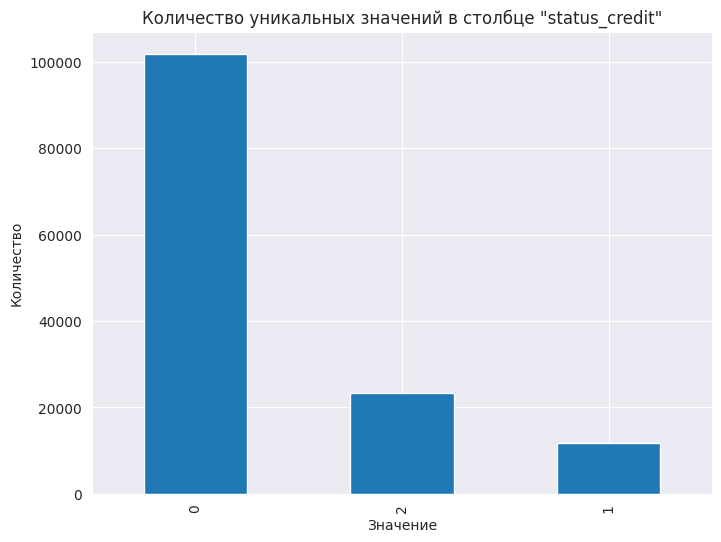

In [ ]:
# Создание графика
plt.figure(figsize=(8, 6))
status_credit_counts.plot(kind='bar')
plt.title('Количество уникальных значений в столбце "status_credit"')
plt.xlabel('Значение')
plt.ylabel('Количество')
plt.show()

## source_information

In [ ]:
db['source_information'].unique()

array(['МФО', 'Банк', 'Коллекторы', 'КПК', 'Другой', 'ЖилищныеКредиты',
       'Розница', 'ФинансоваяКомпания'], dtype=object)

In [ ]:
db['source_information'].value_counts()

МФО                   111586
Банк                   23304
Коллекторы              1897
КПК                      194
Другой                    94
Розница                   39
ЖилищныеКредиты           28
ФинансоваяКомпания         1
Name: source_information, dtype: int64

In [ ]:
# Подсчет количества уникальных значений
source_information_counts = db['source_information'].value_counts()

# Вычисление процентного соотношения
source_information_percentages = round((source_information_counts / source_information_counts.sum()) * 100, 3)

# Вывод результатов
source_information_percentages

МФО                   81.365
Банк                  16.992
Коллекторы             1.383
КПК                    0.141
Другой                 0.069
Розница                0.028
ЖилищныеКредиты        0.020
ФинансоваяКомпания     0.001
Name: source_information, dtype: float64

In [ ]:
# Создаем словарь с соответствиями значений для замены
replace_dict3 = {
    'ФинансоваяКомпания': 'Другой',
    'ИндивидуальныйПредприниматель': 'Другой',
    'Брокер': 'Другой',
    'Розница': 'Другой',
    'ЖилищныеКредиты': 'Другой',
    'КПК': 'Другой',
    'Коллекторы': 'Другой'
}

# Заменяем значения в столбце 'source_information' с использованием словаря замены
db['source_information'] = db['source_information'].replace(replace_dict3)

In [ ]:
# Подсчет количества уникальных значений
source_information_counts = db['source_information'].value_counts()

# Вычисление процентного соотношения
source_information_percentages = round((source_information_counts / source_information_counts.sum()) * 100, 3)

# Вывод результатов
source_information_percentages

МФО       81.365
Банк      16.992
Другой     1.643
Name: source_information, dtype: float64

In [ ]:
db['source_information']= my_label.fit_transform(db['source_information'])  # кодировка переменной
print(db['source_information'].unique())
print("Data Frame after Label Encoding:\n")
db.head(5)

[2 0 1]
Data Frame after Label Encoding:



,population,gender,education,position,dt_nbki,id_nbki,issued,amount,type_credit,status_credit,...,actual_payments_24_Months,amount_surety,source_information,maximum_amount_overdue_indebtedness,date_credit_state,type_debt,amount_principal_debt_repaid,availability_support,Client_class,age
0,11601.0,1,2,7,2023-03-04,fb3f3545-babd-11ed-80cf-f4034344a6bd,2017-03-08,22648.00,1,0,...,0.0,0.0,2,0.0,2017-05-10,NaN,22648.00,0.0,0,33
1,11601.0,1,2,7,2023-03-04,fb3f3545-babd-11ed-80cf-f4034344a6bd,2018-05-09,6000.00,0,0,...,0.0,0.0,0,0.0,2019-04-03,NaN,9513.81,0.0,0,33
2,11601.0,1,2,7,2023-03-04,fb3f3545-babd-11ed-80cf-f4034344a6bd,2018-09-03,48888.70,0,2,...,0.0,0.0,0,0.0,2023-02-17,NaN,95245.21,0.0,0,33
3,11601.0,1,2,7,2023-03-04,fb3f3545-babd-11ed-80cf-f4034344a6bd,2019-02-15,302100.00,0,1,...,0.0,0.0,0,0.0,2022-05-12,NaN,302100.00,1.0,0,33
4,11601.0,1,2,7,2023-03-04,fb3f3545-babd-11ed-80cf-f4034344a6bd,2021-02-08,28612.73,0,0,...,0.0,0.0,0,0.0,2021-08-18,NaN,28612.73,0.0,0,33


##availability_support

In [ ]:
db['availability_support'].unique()

array([0.0, 1.0, '0.0', '1.0', 'False', 'True'], dtype=object)

In [ ]:
# Создаем словарь с соответствиями значений для замены
db.loc[db["availability_support"] == "0.0", "availability_support"] = 0.0
db.loc[db["availability_support"] == "1.0", "availability_support"] = 1.0
db.loc[db["availability_support"] == "False", "availability_support"] = 0.0
db.loc[db["availability_support"] == "True", "availability_support"] = 1.0

In [ ]:
#db = db.drop(columns='availability_support')#удаление столбца availability_support

## issued

In [ ]:
db['issued'].value_counts()

2022-09-15    381
2022-09-27    367
2022-09-26    353
2022-09-12    345
2022-09-14    340
             ... 
2011-07-24      1
2009-08-11      1
2011-10-11      1
2009-03-23      1
2013-10-26      1
Name: issued, Length: 5419, dtype: int64

In [ ]:
db.issued.isna().sum().sum()

0

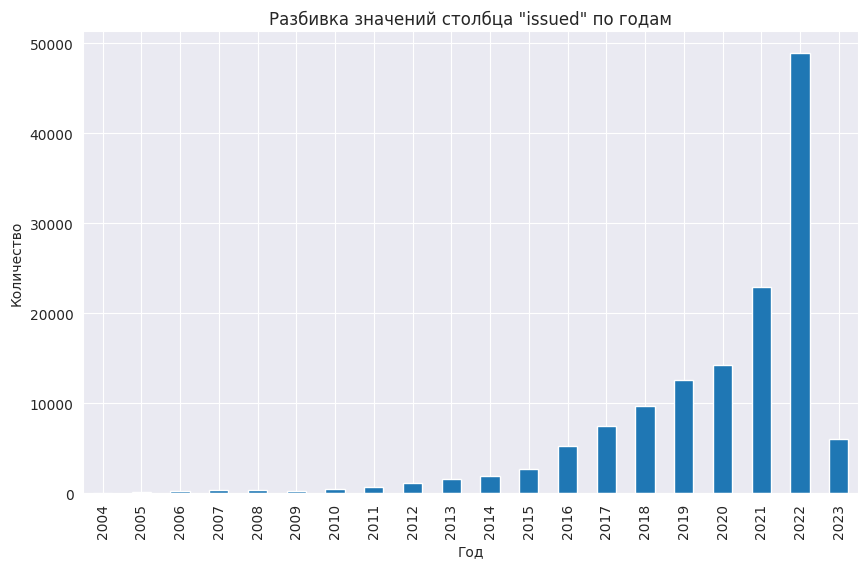

In [ ]:
# Преобразование столбца 'issued' в тип данных datetime, если он еще не является datetime
db['issued'] = pd.to_datetime(db['issued'])

# Разбивка значений столбца 'issued' по годам и подсчет количества
yearly_counts2 = db['issued'].dt.year.value_counts()

# Сортировка по годам
yearly_counts2 = yearly_counts2.sort_index()

# Создание графика разбивки по годам
plt.figure(figsize=(10, 6))
yearly_counts2.plot(kind='bar')
plt.title('Разбивка значений столбца "issued" по годам')
plt.xlabel('Год')
plt.ylabel('Количество')
plt.show()

In [ ]:
db['issued'] = db['issued'].dt.year

In [ ]:
index = db[db['issued'] < 2016.00].index#оставляем только кредиты выданные ранее 2016 года
db.drop(index, inplace=True)

In [ ]:
db['issued'].value_counts()

2022    48881
2021    22883
2020    14264
2019    12646
2018     9710
2017     7514
2023     6103
2016     5221
Name: issued, dtype: int64

## period

In [ ]:
db['period'].unique()

array(['2018-01-08 00:00:00', '2019-04-03 00:00:00',
       '2028-09-04 00:00:00', ..., '2052-07-19 00:00:00',
       '2026-03-23 00:00:00', '2048-10-27 00:00:00'], dtype=object)

In [ ]:
CLMN = "period"
value_for_NA = pd.to_datetime("1900-01-01 00:00:00")
# преобразование в пандосовский тип дат
db[CLMN] = pd.to_datetime(db[CLMN], errors='coerce').fillna(value_for_NA)
print(type(db["period"]))


<class 'pandas.core.series.Series'>


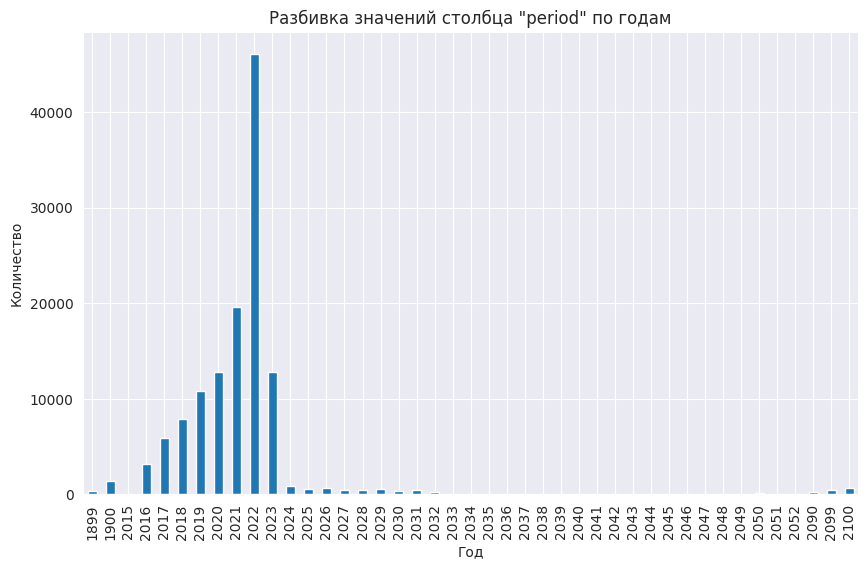

In [ ]:
# Преобразование столбца 'period' в тип данных datetime, если он еще не является datetime
db['period'] = pd.to_datetime(db['period'])

# Разбивка значений столбца 'period' по годам и подсчет количества
yearly_counts1 = db['period'].dt.year.value_counts()

# Сортировка по годам
yearly_counts1 = yearly_counts1.sort_index()

# Создание графика разбивки по годам
plt.figure(figsize=(10, 6))
yearly_counts1.plot(kind='bar')
plt.title('Разбивка значений столбца "period" по годам')
plt.xlabel('Год')
plt.ylabel('Количество')
plt.show()

In [ ]:
db['period'] = db['period'].dt.year

In [ ]:
db.period.isna().sum().sum()

0

In [ ]:
db_copy_1 = db.copy()

In [ ]:
#db = db_copy_1

In [ ]:
# Удаляем period столбцы из DataFrame
#db = db.drop(columns = 'period')

In [ ]:
index = db[db['period'] < 2016.00].index#оставляем только кредиты со сроком погашения не ранее 2016 года
db.drop(index, inplace=True)

In [ ]:
db['period'].value_counts()

2022    46053
2021    19595
2023    12801
2020    12780
2019    10766
2018     7876
2017     5877
2016     3144
2024      899
2100      689
2026      628
2029      586
2025      510
2031      491
2099      489
2027      471
2028      403
2030      358
2032      283
2090      266
2050      109
2051       74
2048       43
2049       43
2046       39
2052       33
2040       31
2047       30
2033       24
2034       14
2036       12
2037       11
2038       10
2035       10
2045        9
2041        9
2042        7
2043        7
2039        6
2044        1
Name: period, dtype: int64

## last_payment

In [ ]:
db['last_payment'].unique()

array(['2017-05-10', '2019-03-26', '2023-02-15', ..., '2016-03-30',
       '2016-07-24', '2017-01-29'], dtype=object)

In [ ]:
db['last_payment'].value_counts()

1900-02-01    11508
1900-01-02     4230
2022-09-26      449
2022-09-15      447
2022-09-12      398
              ...  
2023-05-20        1
2016-05-02        1
2016-05-01        1
2016-10-30        1
2017-01-29        1
Name: last_payment, Length: 2677, dtype: int64

In [ ]:
db.last_payment.isna().sum().sum()

3362

In [ ]:
db = db.dropna (subset=['last_payment'])#удаление строк с пустым last_payment

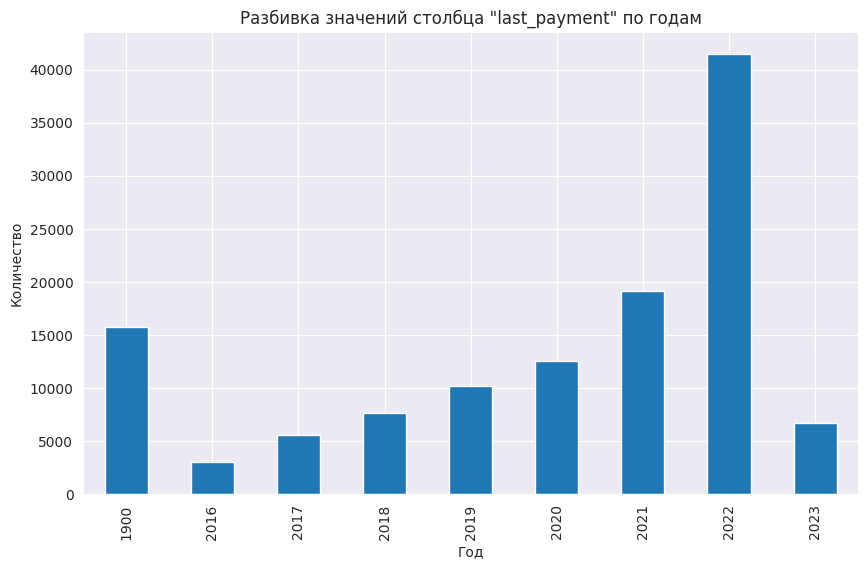

In [ ]:
# Преобразование столбца 'last_payment' в тип данных datetime, если он еще не является datetime
db['last_payment'] = pd.to_datetime(db['last_payment'])

# Разбивка значений столбца 'last_payment' по годам и подсчет количества
yearly_counts = db['last_payment'].dt.year.value_counts()

# Сортировка по годам
yearly_counts = yearly_counts.sort_index()

# Создание графика разбивки по годам
plt.figure(figsize=(10, 6))
yearly_counts.plot(kind='bar')
plt.title('Разбивка значений столбца "last_payment" по годам')
plt.xlabel('Год')
plt.ylabel('Количество')
plt.show()

In [ ]:
db_copy2 = db.copy()

In [ ]:
#db = db_copy2

In [ ]:
db['last_payment'] = db['last_payment'].dt.year

In [ ]:
db['last_payment'].value_counts()

2022    41434
2021    19198
1900    15738
2020    12523
2019    10221
2018     7655
2023     6738
2017     5597
2016     3021
Name: last_payment, dtype: int64

In [ ]:
db.last_payment.head(5)


0    2017
1    2019
2    2023
3    2022
4    2021
Name: last_payment, dtype: int64

In [ ]:
db.loc[db["last_payment"] == 1900, "last_payment"] = 2016 # фильтрация по дате открытия и по дате закрытия ранее была. Заменим данное значение ранним годом из всех вариантов для того чтобы не терать данные

In [ ]:
# Пустые значения
db['last_payment'] = db['last_payment'].fillna(2017.00)
db['last_payment'].isnull().mean()*100

0.0

In [ ]:
# Подсчет количества уникальных значений
last_payment_counts = db['last_payment'].value_counts()

# Вычисление процентного соотношения
last_payment_percentages = round((last_payment_counts / last_payment_counts.sum()) * 100, 3)

# Вывод результатов
print(last_payment_percentages)

2022    33.928
2021    15.720
2016    15.360
2020    10.254
2019     8.369
2018     6.268
2023     5.517
2017     4.583
Name: last_payment, dtype: float64


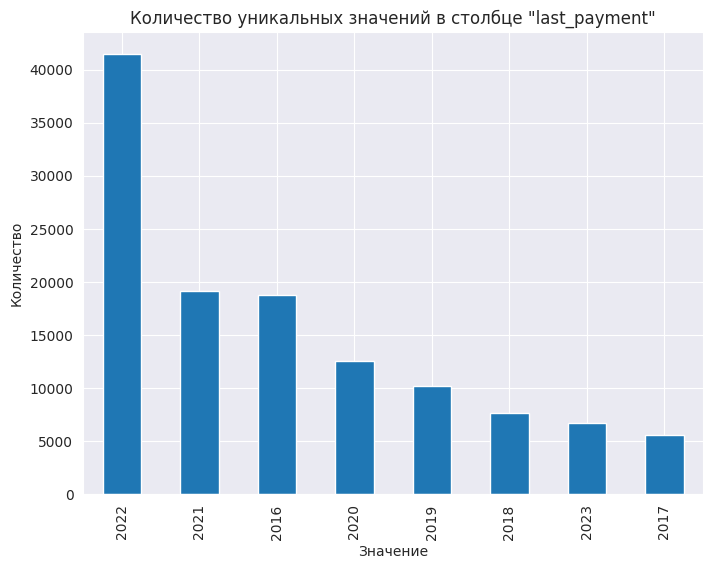

In [ ]:
# Создание графика
plt.figure(figsize=(8, 6))
last_payment_counts.plot(kind='bar')
plt.title('Количество уникальных значений в столбце "last_payment"')
plt.xlabel('Значение')
plt.ylabel('Количество')
plt.show()

## dt_nbki

In [ ]:
db['dt_nbki'].value_counts()

2022-10-07    3689
2022-10-15    3671
2022-10-14    3315
2022-10-12    2943
2022-10-18    2861
              ... 
2021-11-08       1
2021-02-11       1
2023-05-19       1
2021-10-19       1
2022-04-20       1
Name: dt_nbki, Length: 732, dtype: int64

In [ ]:
db.dt_nbki.isna().sum().sum()

0

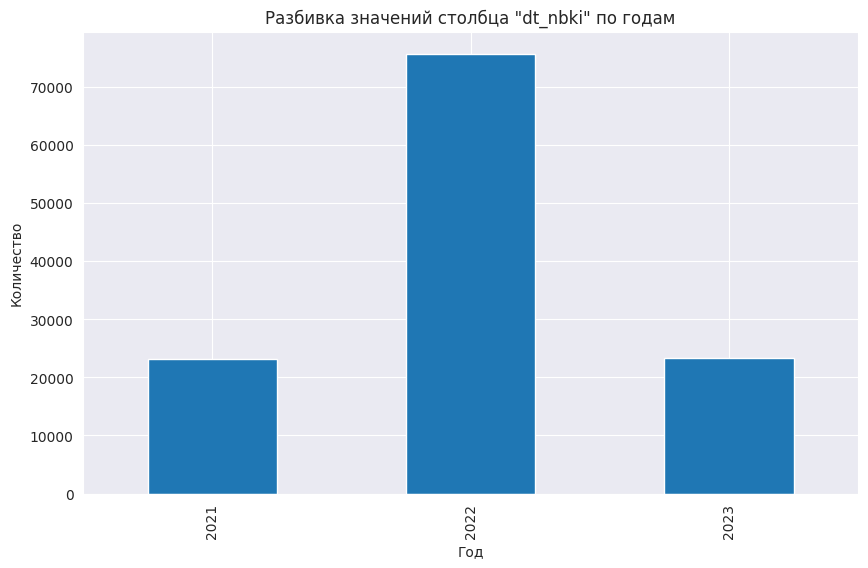

In [ ]:
# Преобразование столбца 'dt_nbki' в тип данных datetime, если он еще не является datetime
db['dt_nbki'] = pd.to_datetime(db['dt_nbki'])

# Разбивка значений столбца 'dt_nbki' по годам и подсчет количества
yearly_counts1 = db['dt_nbki'].dt.year.value_counts()

# Сортировка по годам
yearly_counts1 = yearly_counts1.sort_index()

# Создание графика разбивки по годам
plt.figure(figsize=(10, 6))
yearly_counts1.plot(kind='bar')
plt.title('Разбивка значений столбца "dt_nbki" по годам')
plt.xlabel('Год')
plt.ylabel('Количество')
plt.show()

In [ ]:
db['dt_nbki'] = db['dt_nbki'].dt.year

In [ ]:
db.dt_nbki.head(5)

0    2023
1    2023
2    2023
3    2023
4    2023
Name: dt_nbki, dtype: int64

## updated

In [ ]:
db['updated'].value_counts()

2021-03-11    1581
2021-03-20    1033
2021-03-08     800
2021-03-10     785
2021-03-12     781
              ... 
2016-08-21       1
2016-02-04       1
2016-03-27       1
2017-07-08       1
2016-08-07       1
Name: updated, Length: 2664, dtype: int64

In [ ]:
db.updated.isna().sum().sum()

0

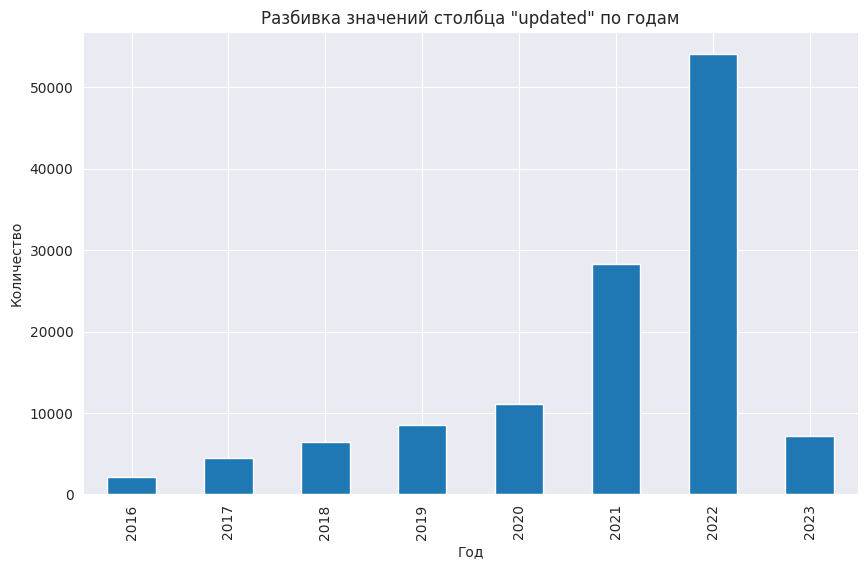

In [ ]:
# Преобразование столбца 'updated' в тип данных datetime, если он еще не является datetime
db['updated'] = pd.to_datetime(db['updated'])

# Разбивка значений столбца 'updated' по годам и подсчет количества
yearly_counts3 = db['updated'].dt.year.value_counts()

# Сортировка по годам
yearly_counts3 = yearly_counts3.sort_index()

# Создание графика разбивки по годам
plt.figure(figsize=(10, 6))
yearly_counts3.plot(kind='bar')
plt.title('Разбивка значений столбца "updated" по годам')
plt.xlabel('Год')
plt.ylabel('Количество')
plt.show()

In [ ]:
db['updated'] = db['updated'].dt.year

In [ ]:
db['updated'].value_counts()

2022    54016
2021    28275
2020    11158
2019     8478
2023     7182
2018     6436
2017     4488
2016     2092
Name: updated, dtype: int64

In [ ]:
db = db.drop(columns='updated')# удалила столбец, он почти полностью дублирует следующий и вряд ли несет смысловую нагрузку

## date_credit_state

In [ ]:
db['date_credit_state'].value_counts()

2022-09-26    586
2022-09-27    570
2022-09-15    507
2022-09-29    497
2022-09-30    491
             ... 
2016-05-01      1
2018-01-07      1
2016-01-18      1
2016-01-12      1
2016-03-08      1
Name: date_credit_state, Length: 2683, dtype: int64

In [ ]:
db.date_credit_state.isna().sum().sum()

1

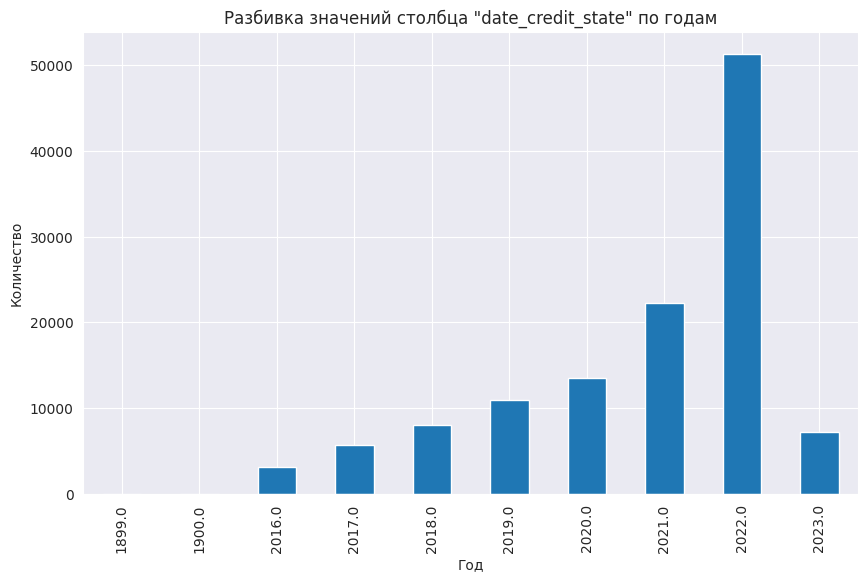

In [ ]:
# Преобразование столбца 'date_credit_state' в тип данных datetime, если он еще не является datetime
db['date_credit_state'] = pd.to_datetime(db['date_credit_state'])

# Разбивка значений столбца 'date_credit_state' по годам и подсчет количества
yearly_counts4 = db['date_credit_state'].dt.year.value_counts()

# Сортировка по годам
yearly_counts4 = yearly_counts4.sort_index()

# Создание графика разбивки по годам
plt.figure(figsize=(10, 6))
yearly_counts4.plot(kind='bar')
plt.title('Разбивка значений столбца "date_credit_state" по годам')
plt.xlabel('Год')
plt.ylabel('Количество')
plt.show()

In [ ]:
db['date_credit_state'] = db['date_credit_state'].dt.year

In [ ]:
index = db[db['date_credit_state'] < 2016.00].index
db.drop(index, inplace=True)

In [ ]:
# Пустые значения
db['date_credit_state'] = db['date_credit_state'].fillna(2016.00)
db['date_credit_state'].isnull().mean()*100

0.0

In [ ]:
db['date_credit_state'].value_counts()

2022.0    51251
2021.0    22215
2020.0    13518
2019.0    11004
2018.0     8031
2023.0     7182
2017.0     5774
2016.0     3143
Name: date_credit_state, dtype: int64

## //days_overdue

In [ ]:
db['days_overdue'].value_counts()

KeyError: ignored

In [ ]:
db['days_overdue'].unique()

KeyError: ignored

In [ ]:
db.days_overdue.isna().sum().sum()

In [ ]:
# Пустые значения
db['days_overdue'] = db['days_overdue'].fillna(0)
db['days_overdue'].isnull().mean()*100

In [ ]:
# Подсчет количества уникальных значений
days_overdue_counts = db['days_overdue'].value_counts()

# Вычисление процентного соотношения
days_overdue_percentages = round((days_overdue_counts / days_overdue_counts.sum()) * 100, 3)

# Вывод результатов
days_overdue_percentages

In [ ]:
db_copy_2 = db.copy()

In [ ]:
db = db_copy_2

In [ ]:
li = [0, 10, 1, 11, 110]

db[db.days_overdue.isin(li)]

In [ ]:
# Подсчет количества уникальных значений
days_overdue_counts = db['days_overdue'].value_counts()

# Вычисление процентного соотношения
days_overdue_percentages = round((days_overdue_counts / days_overdue_counts.sum()) * 100, 3)

# Вывод результатов
days_overdue_percentages

In [ ]:
db.info()

## id_nbki

In [ ]:
db['id_nbki'].unique()

array(['fb3f3545-babd-11ed-80cf-f4034344a6bd',
       '6d788c8c-f394-11ec-b80c-3cfdfed12971',
       'ceb738de-d28d-11ed-b80d-3cfdfed12971', ...,
       'd6bec9c4-5143-11ed-b80c-3cfdfed12971',
       '2ec164d3-4576-11ed-b80c-3cfdfed12971',
       '25a2e409-4b8d-11ed-b80c-3cfdfed12971'], dtype=object)

In [ ]:
db['id_nbki'].value_counts()

4c00e223-4645-11ed-b80c-3cfdfed12971    1226
c869eb53-ea1f-11ed-b80d-3cfdfed12971     864
9c8ba861-f15a-11ed-b80d-3cfdfed12971     719
d4662b87-4a22-11ed-b80c-3cfdfed12971     498
7fe2f782-4a0f-11ed-b80c-3cfdfed12971     474
                                        ... 
026091bb-89b2-11ec-80cf-f4034344a6bd       1
e63a8427-7ae8-11ed-80cf-f4034344a6bd       1
63d13841-4547-11ed-b80c-3cfdfed12971       1
60d2728a-043f-11ed-b80c-3cfdfed12971       1
037efd48-2923-11ed-b80c-3cfdfed12971       1
Name: id_nbki, Length: 3981, dtype: int64

In [ ]:
db['id_nbki']= my_label.fit_transform(db['id_nbki'])  # кодировка переменной
print(db['id_nbki'].unique())
print("Data Frame after Label Encoding:\n")
db.head(5)

[3910 1715 3225 ... 3339  763  603]
Data Frame after Label Encoding:



,population,gender,education,position,dt_nbki,id_nbki,issued,amount,type_credit,status_credit,...,actual_payments_24_Months,amount_surety,source_information,maximum_amount_overdue_indebtedness,date_credit_state,type_debt,amount_principal_debt_repaid,availability_support,Client_class,age
0,11601.0,1,2,7,2023,3910,2017,22648.00,1,0,...,0.0,0.0,2,0.0,2017.0,NaN,22648.00,0.0,0,33
1,11601.0,1,2,7,2023,3910,2018,6000.00,0,0,...,0.0,0.0,0,0.0,2019.0,NaN,9513.81,0.0,0,33
2,11601.0,1,2,7,2023,3910,2018,48888.70,0,2,...,0.0,0.0,0,0.0,2023.0,NaN,95245.21,0.0,0,33
3,11601.0,1,2,7,2023,3910,2019,302100.00,0,1,...,0.0,0.0,0,0.0,2022.0,NaN,302100.00,1.0,0,33
4,11601.0,1,2,7,2023,3910,2021,28612.73,0,0,...,0.0,0.0,0,0.0,2021.0,NaN,28612.73,0.0,0,33


In [ ]:
db.to_csv(r'/content/gdrive/MyDrive/Colab Notebooks/Скоринг/db1.csv', index= False)

In [ ]:
db = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Скоринг/db1.csv')# загрузка ОБРАБОТАННОЙ таблицы по 4м классам со старой и новой базами

#Оценка важности данных

In [ ]:
db.to_csv('/content/gdrive/MyDrive/Colab Notebooks/Скоринг/db_4bal_cod1.csv', index=False)

In [ ]:
db.to_csv('/content/gdrive/MyDrive/Colab Notebooks/Скоринг/db_val_4bal_cod1.csv', index=False)

In [ ]:
db.to_csv('/content/gdrive/MyDrive/Colab Notebooks/Скоринг/db_test_4bal_cod1.csv', index=False)

In [ ]:
from sklearn.feature_selection import mutual_info_regression

In [ ]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103802 entries, 0 to 103801
Data columns (total 33 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   population                           103802 non-null  float64
 1   gender                               103802 non-null  int64  
 2   education                            103802 non-null  int64  
 3   position                             103802 non-null  int64  
 4   dt_nbki                              103802 non-null  int64  
 5   id_nbki                              103802 non-null  int64  
 6   issued                               103802 non-null  int64  
 7   amount                               103802 non-null  float64
 8   type_credit                          103802 non-null  int64  
 9   status_credit                        103802 non-null  int64  
 10  period                               103802 non-null  int64  
 11  psk          

Feature: id_nbki Score: 1.0816155034267236
Feature: date of birth Score: 1.024505339443758
Feature: dt_nbki Score: 0.6086389064207882
Feature: city_name Score: 0.4466638654282633
Feature: population Score: 0.44599297467991583
Feature: updated Score: 0.24236028914712016
Feature: last_payment Score: 0.20705326948024805
Feature: date_credit_state Score: 0.1904970452168655
Feature: amount_principal_debt_repaid Score: 0.1730733860900875
Feature: availability_support Score: 0.173000093981039
Feature: issued Score: 0.16937417341593175
Feature: period Score: 0.1684570226697364
Feature: region_name Score: 0.14673276425273762
Feature: psk Score: 0.1210364091397853
Feature: education Score: 0.11063406046040924
Feature: position Score: 0.07811448823606604
Feature: amount Score: 0.07016541072583138
Feature: type_debt Score: 0.06776594627673838
Feature: balance Score: 0.059341680857542656
Feature: actual_payments_24_Months Score: 0.045466489460709525
Feature: current_indebtedness Score: 0.0336762262

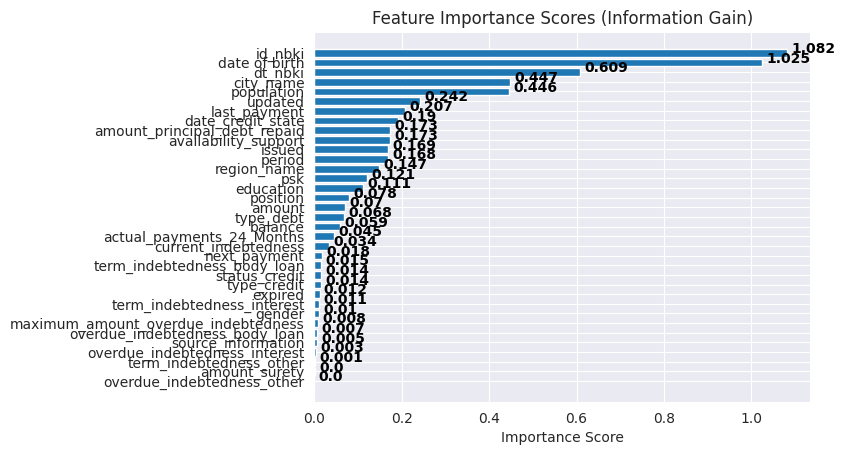

In [ ]:
# Split the dataset into features and target
X = db.drop('Client_class', axis=1)
y = np.array(db['Client_class'])

# Apply Information Gain
ig = mutual_info_regression(X, y)

# Create a dictionary of feature importance scores
feature_scores = {}
for i in range(len(X.columns.values)):
    feature_scores[X.columns.values[i]] = ig[i]
# Sort the features by importance score in descending order
sorted_features = sorted(feature_scores.items(), key=lambda x: x[1], reverse=True)

# Print the feature importance scores and the sorted features
for feature, score in sorted_features:
    print("Feature:", feature, "Score:", score)
# Plot a horizontal bar chart of the feature importance scores
fig, ax = plt.subplots()
y_pos = np.arange(len(sorted_features))
ax.barh(y_pos, [score for feature, score in sorted_features], align="center")
ax.set_yticks(y_pos)
ax.set_yticklabels([feature for feature, score in sorted_features])
ax.invert_yaxis()  # Labels read top-to-bottom
ax.set_xlabel("Importance Score")
ax.set_title("Feature Importance Scores (Information Gain)")

# Add importance scores as labels on the horizontal bar chart
for i, v in enumerate([score for feature, score in sorted_features]):
    ax.text(v + 0.01, i, str(round(v, 3)), color="black", fontweight="bold")
plt.show()

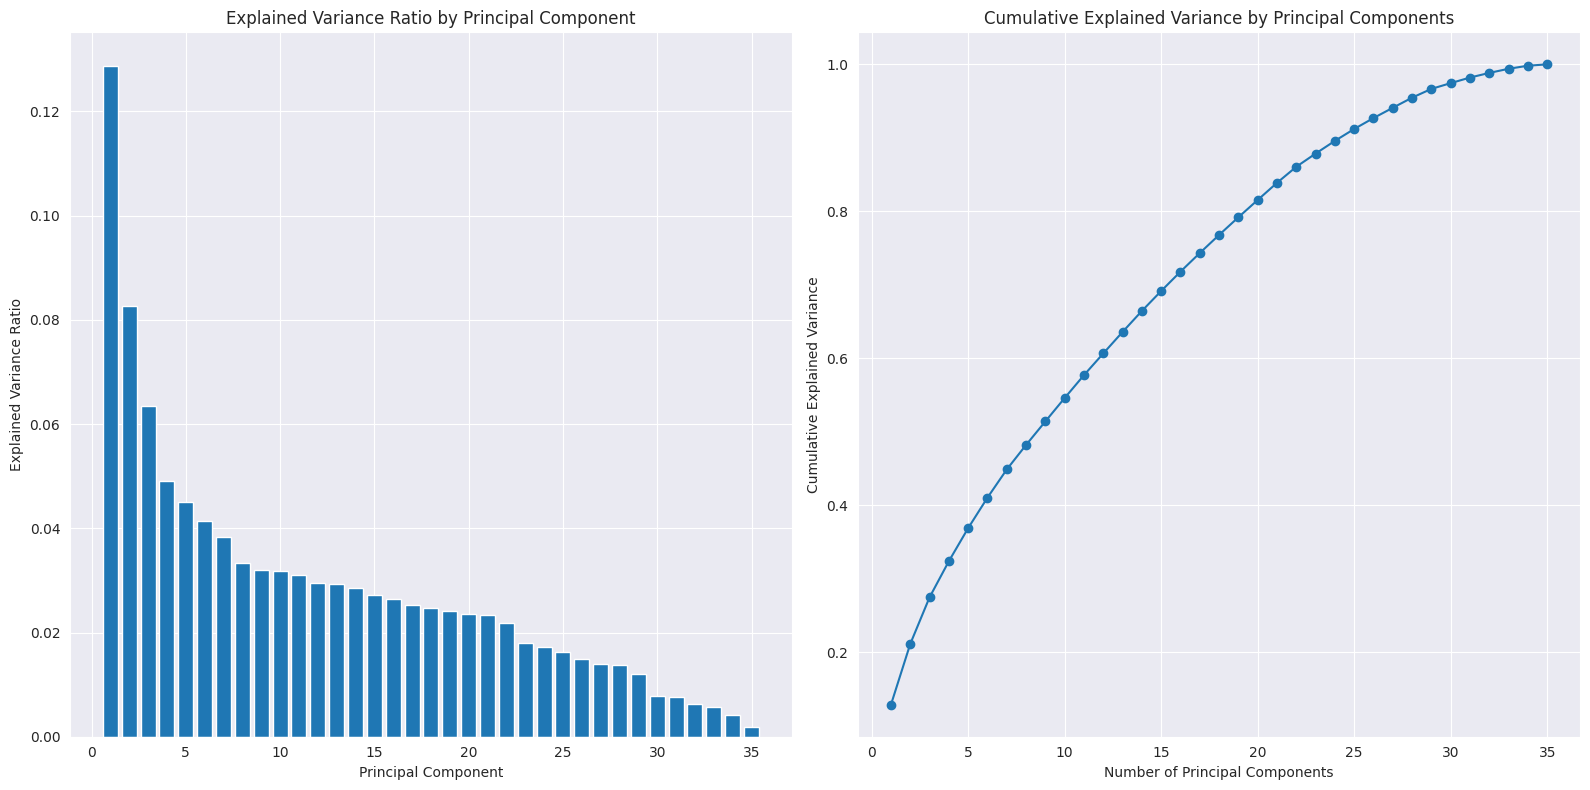

In [ ]:
#PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Create a 2x1 grid of subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# Plot the explained variance ratio in the first subplot
ax1.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
ax1.set_xlabel("Principal Component")
ax1.set_ylabel("Explained Variance Ratio")
ax1.set_title("Explained Variance Ratio by Principal Component")

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plot the cumulative explained variance in the second subplot
ax2.plot(
    range(1, len(cumulative_explained_variance) + 1),
    cumulative_explained_variance,
    marker="o",
)
ax2.set_xlabel("Number of Principal Components")
ax2.set_ylabel("Cumulative Explained Variance")
ax2.set_title("Cumulative Explained Variance by Principal Components")

# Display the figure
plt.tight_layout()
plt.show()

## Корреляция

In [ ]:
db = db.reset_index(drop=True)

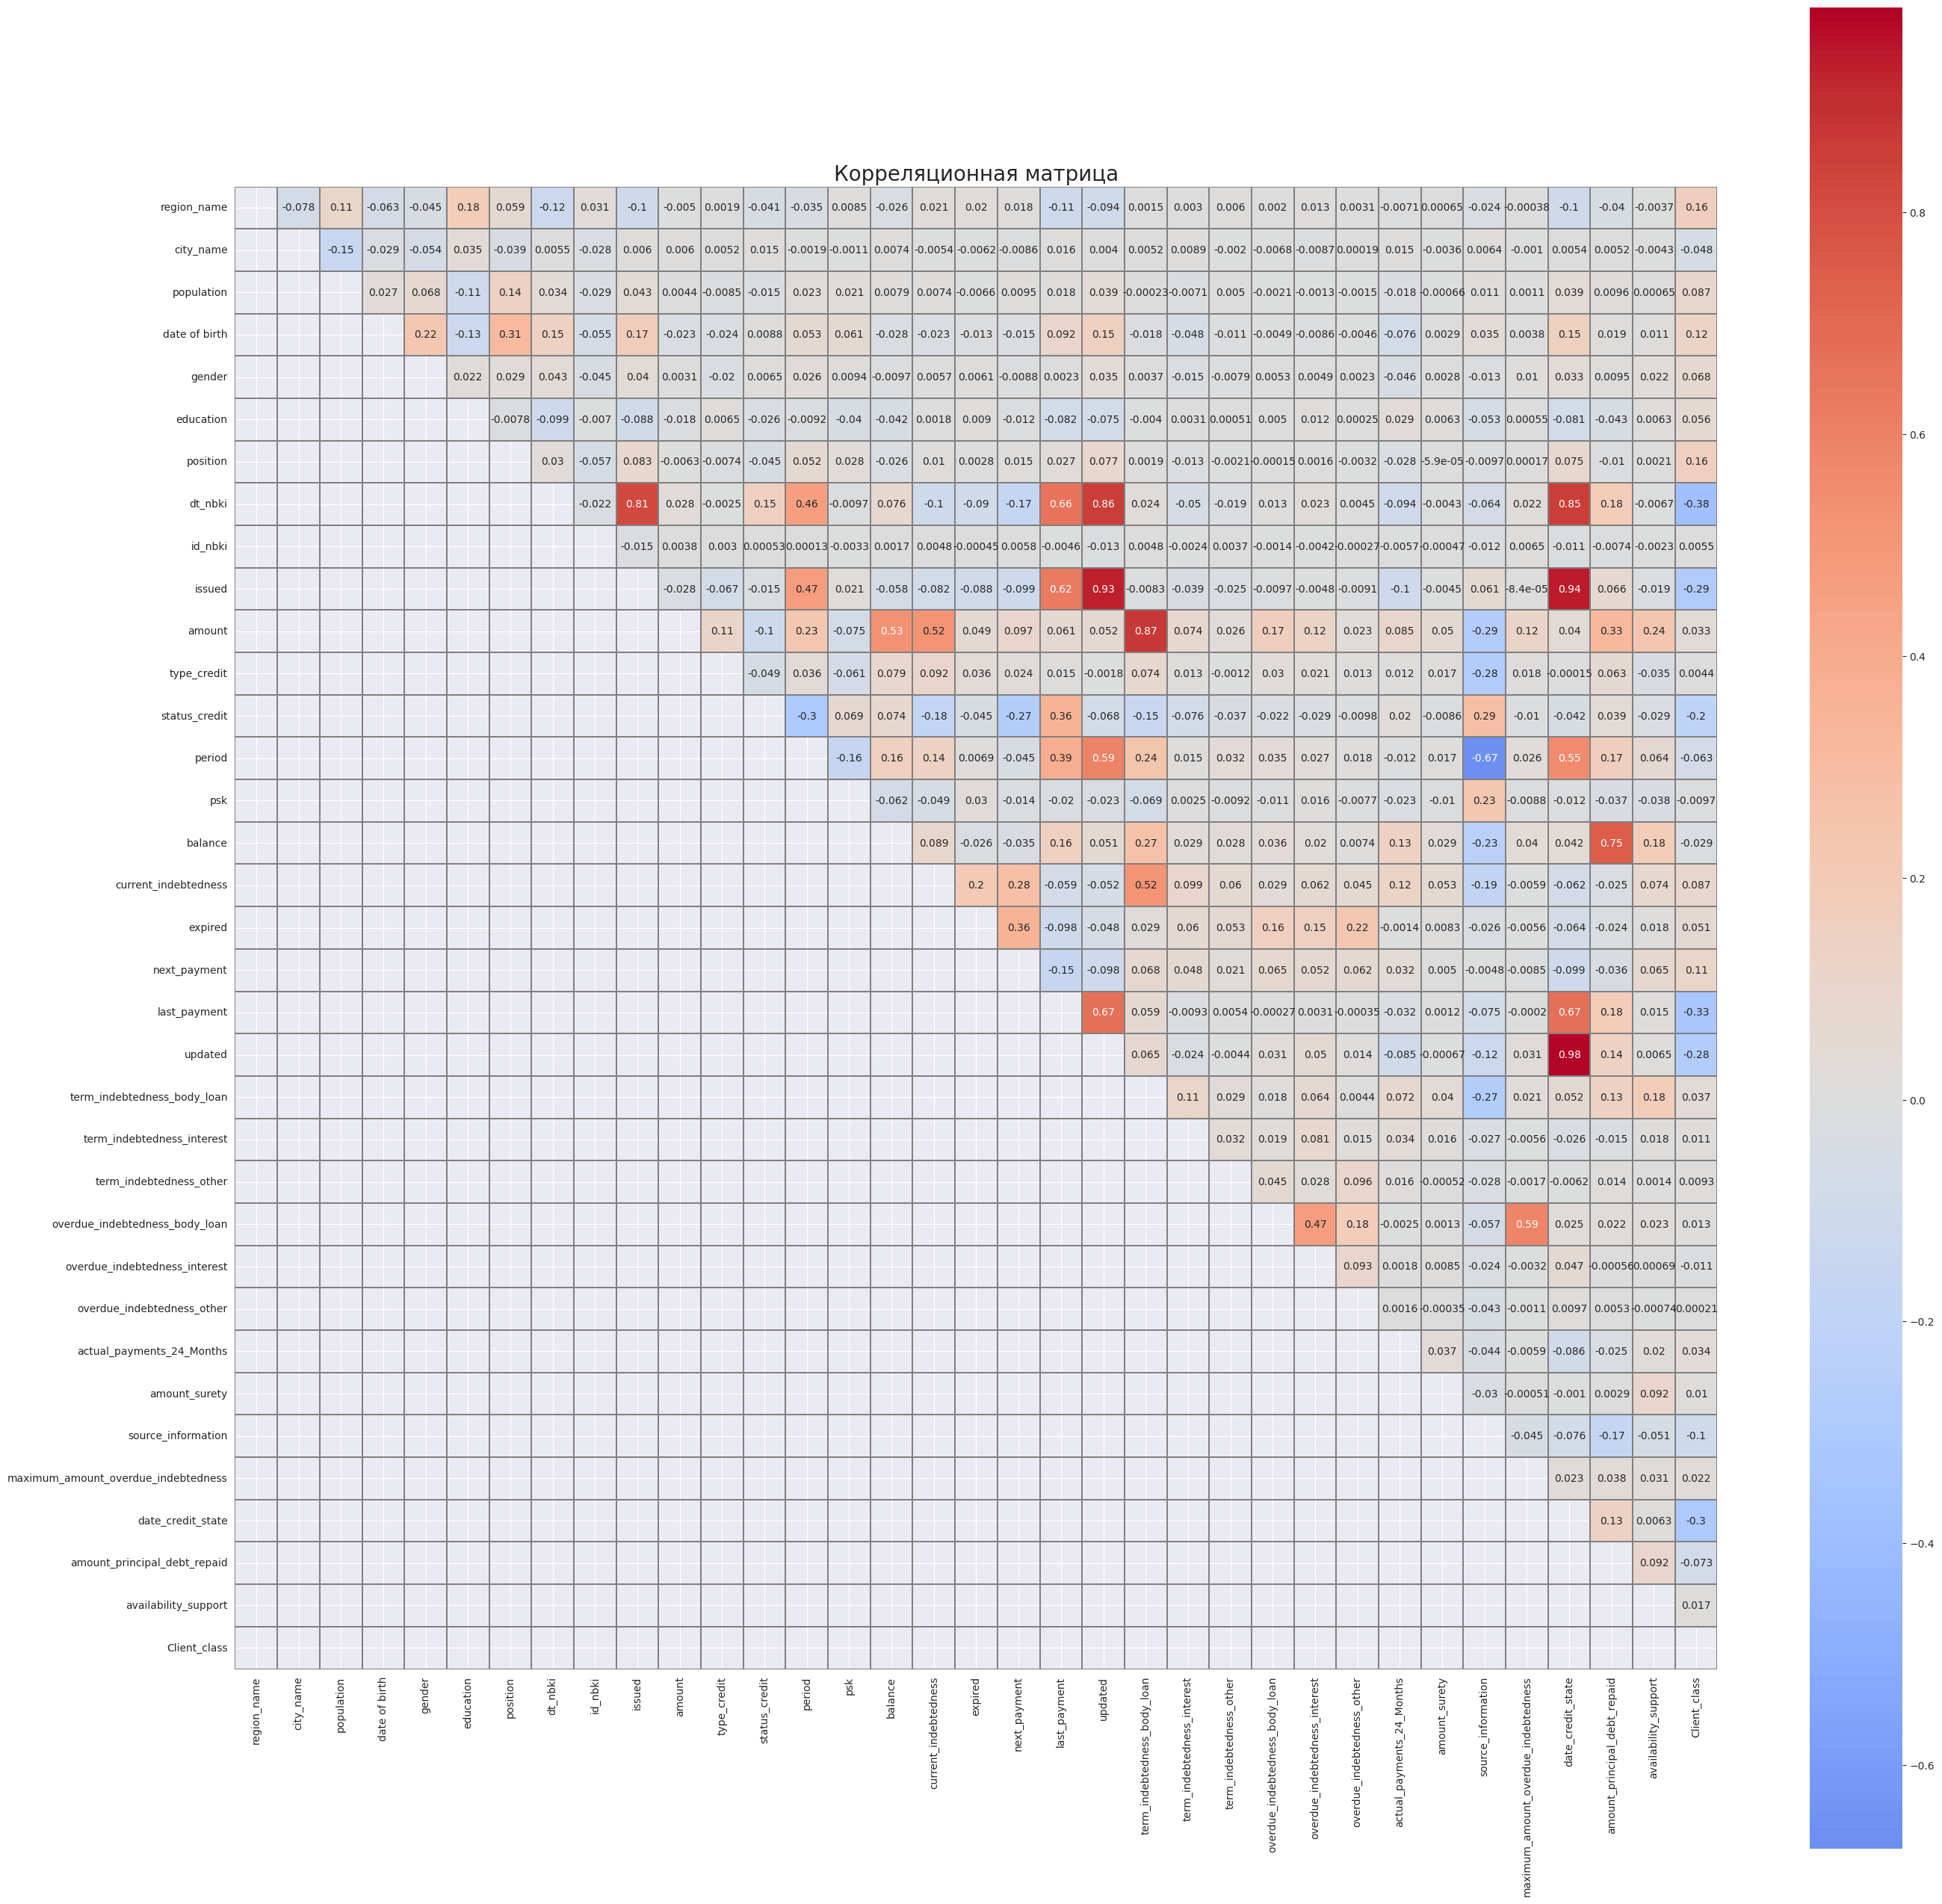

In [ ]:
# Таблица корреляции признаков
mask_1 = np.tril(db.corr())
plt.figure(figsize=(32,32))
sns.heatmap(db.corr(), cmap='coolwarm', center= 0, square=True, annot=True, linewidths =0.05, linecolor= 'gray', mask = mask_1)
plt.title("Корреляционная матрица", fontsize=20)
plt.show()

In [ ]:
spearman_correlation = db.corr(method='spearman')
spearman_correlation

,region_name,city_name,population,date of birth,gender,education,position,dt_nbki,id_nbki,issued,...,overdue_indebtedness_other,actual_payments_24_Months,amount_surety,source_information,maximum_amount_overdue_indebtedness,date_credit_state,type_debt,amount_principal_debt_repaid,availability_support,Client_class
region_name,1.000000,-0.082486,-0.116469,-0.183671,-0.047163,0.310742,-0.124771,-0.074292,0.016243,-0.194166,...,0.007744,0.045051,0.009897,-0.084166,0.088824,-0.166554,-0.100576,-0.039241,0.001929,-0.167973
city_name,-0.082486,1.000000,-0.091174,0.004884,-0.010465,-0.035065,-0.052047,0.057049,-0.050898,0.057996,...,-0.013076,-0.043255,0.012287,-0.001148,-0.000747,0.061445,0.094559,0.066324,-0.010882,-0.027494
population,-0.116469,-0.091174,1.000000,0.135916,0.111871,-0.374465,0.140630,0.023569,-0.009608,0.093338,...,-0.001222,-0.016891,-0.016180,0.141850,-0.102099,0.048892,0.007169,-0.005599,0.020915,0.136868
date of birth,-0.183671,0.004884,0.135916,1.000000,0.311097,-0.252548,0.434588,-0.016349,0.017142,0.244854,...,0.014849,0.021602,0.001273,0.149665,-0.063759,0.203799,-0.058560,-0.123944,-0.002318,0.268436
gender,-0.047163,-0.010465,0.111871,0.311097,1.000000,-0.109366,0.113474,-0.042164,0.001569,0.087345,...,0.010633,0.037359,0.011459,0.034037,-0.036375,0.073082,-0.083870,-0.078397,0.019834,0.071033
education,0.310742,-0.035065,-0.374465,-0.252548,-0.109366,1.000000,-0.186461,-0.067427,-0.028938,-0.239006,...,0.018482,0.036440,0.004999,-0.152389,0.112989,-0.194961,-0.084276,-0.052343,-0.004107,-0.201863
position,-0.124771,-0.052047,0.140630,0.434588,0.113474,-0.186461,1.000000,0.002150,-0.011618,0.198514,...,0.002742,0.005323,-0.004078,0.070470,-0.059894,0.181438,-0.016862,-0.066987,0.002408,0.228246
dt_nbki,-0.074292,0.057049,0.023569,-0.016349,-0.042164,-0.067427,0.002150,1.000000,-0.010910,0.117291,...,-0.068673,-0.293177,-0.031789,0.047335,0.117261,0.150923,0.442962,0.323053,-0.044814,-0.037768
id_nbki,0.016243,-0.050898,-0.009608,0.017142,0.001569,-0.028938,-0.011618,-0.010910,1.000000,0.007581,...,-0.005056,0.003227,-0.008716,0.015671,-0.001302,0.004490,0.000106,0.008594,-0.004904,0.025364
issued,-0.194166,0.057996,0.093338,0.244854,0.087345,-0.239006,0.198514,0.117291,0.007581,1.000000,...,-0.015672,-0.021031,-0.014094,0.420748,-0.179518,0.893089,0.113109,-0.088772,-0.014917,0.255706


In [ ]:
db['Client_class'].unique()

array([0, 1, 2, 3])

## перевод в numpy_array

Разбиваем данные на X и Y

In [ ]:
db = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Скоринг/db_cat_cl.csv')

In [ ]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87315 entries, 0 to 87314
Data columns (total 36 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   region_name                          87315 non-null  int8   
 1   city_name                            87315 non-null  int16  
 2   population                           87315 non-null  float64
 3   date of birth                        87315 non-null  int16  
 4   gender                               87315 non-null  int8   
 5   education                            87315 non-null  int8   
 6   position                             87315 non-null  int8   
 7   dt_nbki                              87315 non-null  int16  
 8   id_nbki                              87315 non-null  int16  
 9   issued                               87315 non-null  int16  
 10  amount                               87315 non-null  float64
 11  type_credit                 

In [ ]:
db.head(5)


,region_name,city_name,population,date of birth,gender,education,position,dt_nbki,id_nbki,issued,...,overdue_indebtedness_other,actual_payments_24_Months,amount_surety,source_information,maximum_amount_overdue_indebtedness,date_credit_state,type_debt,amount_principal_debt_repaid,availability_support,Client_class
0,67,240,169057.0,898,0,5,4,443,432,1107,...,0.0,0.0,0.0,0,0.00,2128,0,19405.20,0,0
1,67,240,169057.0,898,0,5,4,443,432,1387,...,0.0,0.0,0.0,0,651.33,3103,0,57181.73,0,0
2,67,240,169057.0,898,0,5,4,443,432,1387,...,0.0,0.0,0.0,0,0.00,1968,0,149300.74,0,0
3,67,240,169057.0,898,0,5,4,443,432,1140,...,0.0,0.0,0.0,0,314.00,1756,0,409000.00,0,0
4,67,240,169057.0,898,0,5,4,443,432,1846,...,0.0,0.0,0.0,0,0.00,1392,0,36372.74,0,0


In [ ]:
X = db.drop('Client_class', axis=1)
y = np.array(db['Client_class'])

In [ ]:
#y = np.subtract(y, 1)#если классы идут с 1

In [ ]:
X, y

(       region_name  city_name  population  date of birth  gender  education  \
 0               67        240    169057.0            898       0          5   
 1               67        240    169057.0            898       0          5   
 2               67        240    169057.0            898       0          5   
 3               67        240    169057.0            898       0          5   
 4               67        240    169057.0            898       0          5   
 ...            ...        ...         ...            ...     ...        ...   
 87310           11         18     73623.0           1377       1          6   
 87311           11         18     73623.0           1377       1          6   
 87312           11         18     73623.0           1377       1          6   
 87313           55         74     93658.0           2002       0          5   
 87314           55         74     93658.0           2002       0          5   
 
        position  dt_nbki  id_nbki  is

In [ ]:
scaler = StandardScaler(with_mean=False) # Нормализуем данные
scaler.fit(X)
x = scaler.transform(X)
print(x) # Посмотрим на нормализованные данные
print(np.unique(y))

[[3.20017001e+00 1.37613077e+00 3.29613978e-01 ... 0.00000000e+00
  1.05020655e-01 0.00000000e+00]
 [3.20017001e+00 1.37613077e+00 3.29613978e-01 ... 0.00000000e+00
  3.09466677e-01 0.00000000e+00]
 [3.20017001e+00 1.37613077e+00 3.29613978e-01 ... 0.00000000e+00
  8.08013397e-01 0.00000000e+00]
 ...
 [5.25401047e-01 1.03209808e-01 1.43544307e-01 ... 0.00000000e+00
  1.61101811e-01 0.00000000e+00]
 [2.62700523e+00 4.24306989e-01 1.82606966e-01 ... 0.00000000e+00
  6.27023948e-02 0.00000000e+00]
 [2.62700523e+00 4.24306989e-01 1.82606966e-01 ... 0.00000000e+00
  2.08361431e-03 0.00000000e+00]]
[0 1 2 3]


In [ ]:
from keras.utils import to_categorical

In [ ]:
# разбиваем на train и test
x_train, x_test, y_train, y_test = train_test_split(x, y, shuffle=True, test_size=0.2, random_state=42, stratify=y)
print('Размер x_train:',x_train.shape)
print('Размер y_train:',y_train.shape)

Размер x_train: (69852, 35)
Размер y_train: (69852,)


In [ ]:
n = y.shape[0]

In [ ]:
n

654934

In [ ]:
CLASS_COUNT=4
# Преобразование ответов в формат one_hot_encoding
y_train = to_categorical(y_train, num_classes = 4)
y_test = to_categorical(y_test, num_classes = 4)

print('Размер y_train:',y_train.shape)
print('Размер y_test:',y_test.shape)


Размер y_train: (69852, 4)
Размер y_test: (17463, 4)


In [ ]:
np.unique(y_train)

array([1, 2, 3, 4])

In [ ]:
len(np.unique(y_train))

4

In [ ]:
np.unique(y_test)

array([0., 1.], dtype=float32)

# AK

In [ ]:
search = ak.StructuredDataClassifier(max_trials=3)

In [ ]:
search.fit(x=x_train, y=y_train, verbose=1, epochs=150)

Trial 3 Complete [00h 13m 15s]
val_accuracy: 0.8201372027397156

Best val_accuracy So Far: 0.8201372027397156
Total elapsed time: 00h 39m 48s
Epoch 1/150
1854/1854 [==============================] - 5s 2ms/step - loss: 0.9606 - accuracy: 0.5989
Epoch 2/150
1854/1854 [==============================] - 6s 3ms/step - loss: 0.8314 - accuracy: 0.6548
Epoch 3/150
1854/1854 [==============================] - 4s 2ms/step - loss: 0.7842 - accuracy: 0.6776
Epoch 4/150
1854/1854 [==============================] - 4s 2ms/step - loss: 0.7460 - accuracy: 0.6940
Epoch 5/150
1854/1854 [==============================] - 6s 3ms/step - loss: 0.7146 - accuracy: 0.7112
Epoch 6/150
1854/1854 [==============================] - 4s 2ms/step - loss: 0.6892 - accuracy: 0.7242
Epoch 7/150
1854/1854 [==============================] - 6s 3ms/step - loss: 0.6673 - accuracy: 0.7349
Epoch 8/150
1854/1854 [==============================] - 5s 2ms/step - loss: 0.6484 - accuracy: 0.7436
Epoch 9/150
1854/1854 [===========

In [ ]:
loss, acc = search.evaluate(x_test, y_test, verbose=0) #classification

y_predictions = search.predict(x_test)# оценка производительности модели

464/464 [==============================] - 2s 3ms/step


In [ ]:
acc

0.2138921618461609

In [ ]:
y_predictions

array([[2.5696656e-01, 1.1921113e-04, 7.0718391e-04, 7.4220705e-01],
       [1.0107590e-01, 1.0330700e-02, 8.2221162e-01, 6.6381849e-02],
       [2.7168539e-01, 8.0146037e-07, 9.7447950e-03, 7.1856910e-01],
       ...,
       [3.0607908e-04, 3.0887371e-03, 6.5081984e-01, 3.4578529e-01],
       [2.4626951e-04, 2.6548782e-03, 5.9241563e-01, 4.0468317e-01],
       [2.1197660e-04, 2.2519541e-03, 5.4627585e-01, 4.5126015e-01]],
      dtype=float32)

In [ ]:
model = search.export_model()# сохранение модели

In [ ]:
model.summary()# вывод лучшей архитектуры

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 34)]              0         
                                                                 
 multi_category_encoding (M  (None, 34)                0         
 ultiCategoryEncoding)                                           
                                                                 
 normalization (Normalizati  (None, 34)                69        
 on)                                                             
                                                                 
 dense (Dense)               (None, 64)                2240      
                                                                 
 re_lu (ReLU)                (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080  

In [ ]:
model.save('/content/gdrive/MyDrive/Colab Notebooks/Скоринг/model_AK_cat_cl.keras')

In [ ]:
loss, acc = search.evaluate(xt, yt) #classification на тестовой базе

y_predictions = search.predict(xt)# оценка производительности модели

795/795 [==============================] - 2s 3ms/step


#Модель1

In [ ]:

number_of_cols = x_train.shape[1]

model12_cl = Sequential() # Последовательная модель нейронной сети

model12_cl.add(Dense(1024, input_dim=number_of_cols, activation='relu'))
model12_cl.add(BatchNormalization())
model12_cl.add(Dense(128, activation='relu'))
#model12_cl.add(Dense(32, activation='relu'))
model12_cl.add(Dense(4, activation='softmax'))

model12_cl.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              36864     
                                                                 
 batch_normalization (Batch  (None, 1024)              4096      
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 128)               131200    
                                                                 
 dense_2 (Dense)             (None, 4)                 516       
                                                                 
Total params: 172676 (674.52 KB)
Trainable params: 170628 (666.52 KB)
Non-trainable params: 2048 (8.00 KB)
_________________________________________________________________


In [ ]:
model12_cl.compile(optimizer=Adam(learning_rate=0.0001),
              metrics=['accuracy'],
              loss='CategoricalCrossentropy')

In [ ]:
x_train.shape, y_train.shape

((69852, 35), (69852, 4))

Epoch 1/300
35/35 [==============================] - 15s 190ms/step - loss: 1.1658 - accuracy: 0.4975 - val_loss: 1.2173 - val_accuracy: 0.4658
Epoch 2/300
35/35 [==============================] - 4s 119ms/step - loss: 0.9290 - accuracy: 0.6176 - val_loss: 1.1712 - val_accuracy: 0.4737
Epoch 3/300
35/35 [==============================] - 3s 100ms/step - loss: 0.8857 - accuracy: 0.6345 - val_loss: 1.1167 - val_accuracy: 0.5130
Epoch 4/300
35/35 [==============================] - 5s 136ms/step - loss: 0.8587 - accuracy: 0.6498 - val_loss: 1.0705 - val_accuracy: 0.5346
Epoch 5/300
35/35 [==============================] - 5s 134ms/step - loss: 0.8379 - accuracy: 0.6631 - val_loss: 1.0170 - val_accuracy: 0.5870
Epoch 6/300
35/35 [==============================] - 4s 120ms/step - loss: 0.8211 - accuracy: 0.6724 - val_loss: 0.9757 - val_accuracy: 0.6111
Epoch 7/300
35/35 [==============================] - 3s 92ms/step - loss: 0.8059 - accuracy: 0.6804 - val_loss: 0.9362 - val_accuracy: 0.6367

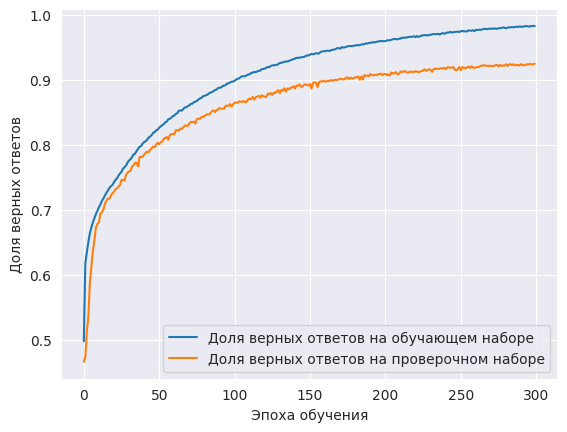

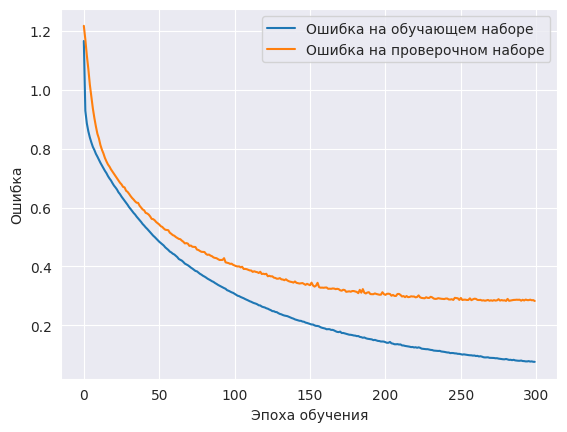

In [ ]:
import time
start_time = time.time() # счетчик времени
history = model12_cl.fit(x_train,                            # Обучающая выборка
                        y_train,                               # Метки классов обучающей выборки
                        epochs=300,                             # Количество эпох
                        batch_size=2048,                         # Размер подвыборки для одного шага по данным на эпохе
                        validation_data=(x_test, y_test))   # Проверочная выборка и метки классов проверочной выборки

end_time = time.time() # счетчик времени
print("Время обучения: ", end_time - start_time) # вывод времени обучения
total_time = end_time - start_time # calculate the total time

print("Total time taken:", total_time, "seconds") # print the total time taken to train the model
print(max(history.history['accuracy'])) # print the highest accuracy achieved by the model

plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

plt.plot(history.history['loss'],
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'],
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

In [ ]:
model12_cl.save('/content/gdrive/MyDrive/Colab Notebooks/Скоринг/model12_cl.keras')

In [ ]:
y_pred = model12_cl.predict(x_test) # predict probabilities for each class
y_pred_PositiveClass = y_pred[:,1] # only  positive class predictions


546/546 [==============================] - 2s 3ms/step


In [ ]:
y_pred_PositiveClass

array([8.0387986e-01, 3.0031163e-02, 0.0000000e+00, ..., 9.8184341e-01,
       3.8042274e-30, 4.1170278e-01], dtype=float32)

In [ ]:
loss, acc = model12_cl.evaluate(x_test, y_test, verbose=0) #classification

In [ ]:
acc

0.9243543744087219

#Модель 2

In [ ]:
number_of_cols = x_train.shape[1]

model22_cl = Sequential() # Последовательная модель нейронной сети

model22_cl.add(Dense(512, input_dim=number_of_cols, activation='relu'))
model22_cl.add(Dense(256, activation='relu'))
model22_cl.add(Dense(4, activation='softmax'))

model22_cl.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               18432     
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                                 
 dense_8 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 150788 (589.02 KB)
Trainable params: 150788 (589.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model22_cl.compile(optimizer=Adam(learning_rate=0.005),
              metrics=['accuracy'],
              loss='CategoricalCrossentropy')

In [ ]:
x_train.shape, y_train.shape

((69852, 35), (69852, 4))

Epoch 1/50
69/69 [==============================] - 6s 69ms/step - loss: 1.1089 - accuracy: 0.5229 - val_loss: 0.9478 - val_accuracy: 0.5914
Epoch 2/50
69/69 [==============================] - 4s 58ms/step - loss: 0.8953 - accuracy: 0.6225 - val_loss: 0.8667 - val_accuracy: 0.6325
Epoch 3/50
69/69 [==============================] - 4s 63ms/step - loss: 0.8301 - accuracy: 0.6543 - val_loss: 0.8106 - val_accuracy: 0.6647
Epoch 4/50
69/69 [==============================] - 4s 60ms/step - loss: 0.7749 - accuracy: 0.6828 - val_loss: 0.7686 - val_accuracy: 0.6869
Epoch 5/50
69/69 [==============================] - 2s 28ms/step - loss: 0.7309 - accuracy: 0.7011 - val_loss: 0.7217 - val_accuracy: 0.7072
Epoch 6/50
69/69 [==============================] - 2s 29ms/step - loss: 0.6891 - accuracy: 0.7235 - val_loss: 0.6981 - val_accuracy: 0.7169
Epoch 7/50
69/69 [==============================] - 2s 26ms/step - loss: 0.6552 - accuracy: 0.7396 - val_loss: 0.6764 - val_accuracy: 0.7351
Epoch 8/50
69

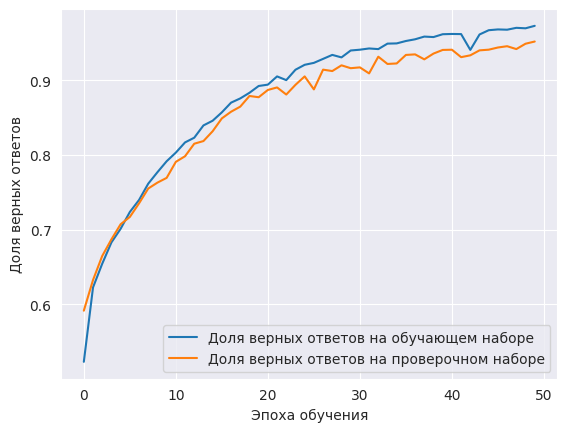

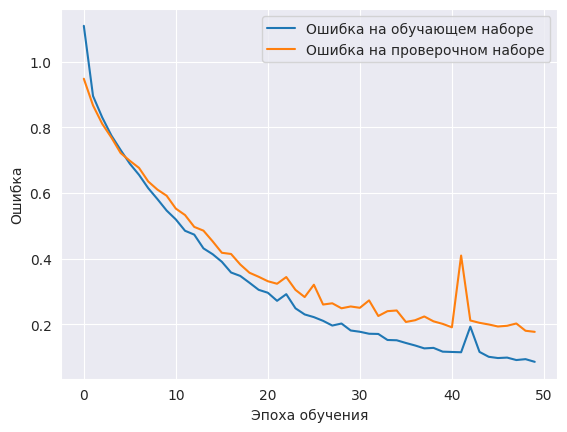

In [ ]:
import time
start_time = time.time() # счетчик времени
history = model22_cl.fit(x_train,                            # Обучающая выборка
                        y_train,                               # Метки классов обучающей выборки
                        epochs=50,                             # Количество эпох
                        batch_size=1024,                         # Размер подвыборки для одного шага по данным на эпохе
                        validation_data=(x_test, y_test))   # Проверочная выборка и метки классов проверочной выборки

end_time = time.time() # счетчик времени
print("Время обучения: ", end_time - start_time) # вывод времени обучения
total_time = end_time - start_time # calculate the total time

print("Total time taken:", total_time, "seconds") # print the total time taken to train the model
print(max(history.history['accuracy'])) # print the highest accuracy achieved by the model

plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

plt.plot(history.history['loss'],
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'],
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

In [ ]:
model22_cl.save('/content/gdrive/MyDrive/Colab Notebooks/Скоринг/model22_cl.keras')

In [ ]:
loss, acc = model22_cl.evaluate(Xt, yt) #classification

y_predictions = model22_cl.predict(Xt)# оценка производительности модели

NameError: ignored

In [ ]:
acc

#База без id_nbki и dt_nbki

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87315 entries, 0 to 87314
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   region_name                          87315 non-null  int8   
 1   city_name                            87315 non-null  int16  
 2   population                           87315 non-null  float64
 3   date of birth                        87315 non-null  int16  
 4   gender                               87315 non-null  int8   
 5   education                            87315 non-null  int8   
 6   position                             87315 non-null  int8   
 7   dt_nbki                              87315 non-null  int16  
 8   id_nbki                              87315 non-null  int16  
 9   issued                               87315 non-null  int16  
 10  amount                               87315 non-null  float64
 11  type_credit                 

In [ ]:
X1 = X.drop(columns = 'id_nbki')

In [ ]:
X1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87315 entries, 0 to 87314
Data columns (total 34 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   region_name                          87315 non-null  int8   
 1   city_name                            87315 non-null  int16  
 2   population                           87315 non-null  float64
 3   date of birth                        87315 non-null  int16  
 4   gender                               87315 non-null  int8   
 5   education                            87315 non-null  int8   
 6   position                             87315 non-null  int8   
 7   dt_nbki                              87315 non-null  int16  
 8   issued                               87315 non-null  int16  
 9   amount                               87315 non-null  float64
 10  type_credit                          87315 non-null  int8   
 11  status_credit               

Feature: date of birth Score: 1.3041760816519101
Feature: city_name Score: 0.5515053247673833
Feature: population Score: 0.5497316655783617
Feature: dt_nbki Score: 0.39611029323694424
Feature: type_debt Score: 0.2587135055855416
Feature: amount_principal_debt_repaid Score: 0.1506295910473261
Feature: last_payment Score: 0.1400519254130046
Feature: region_name Score: 0.1307855384112795
Feature: position Score: 0.1306951081545975
Feature: updated Score: 0.11770391928319413
Feature: date_credit_state Score: 0.1111140290130237
Feature: psk Score: 0.11031338544904212
Feature: balance Score: 0.10759546458925406
Feature: period Score: 0.09876526783980921
Feature: issued Score: 0.09866594350657643
Feature: education Score: 0.07398000549211847
Feature: amount Score: 0.06300619270423091
Feature: actual_payments_24_Months Score: 0.05740607727892222
Feature: current_indebtedness Score: 0.05638115714800307
Feature: maximum_amount_overdue_indebtedness Score: 0.054724168762001923
Feature: next_paymen

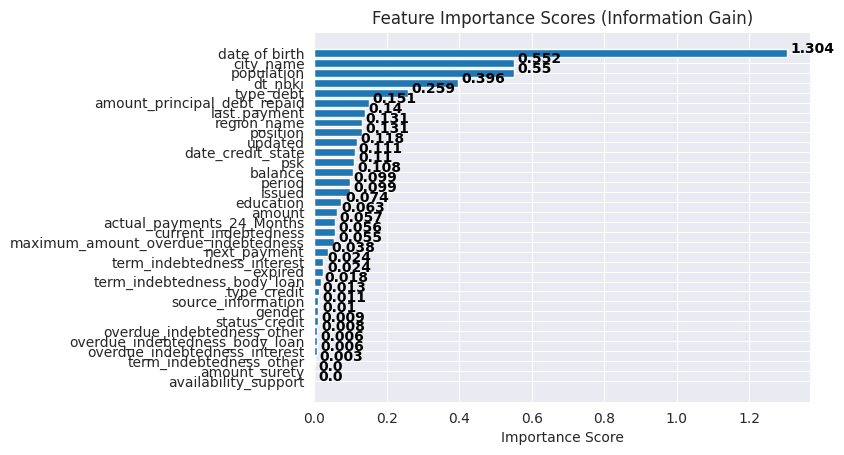

In [ ]:
# Apply Information Gain
ig = mutual_info_regression(X1, y)

# Create a dictionary of feature importance scores
feature_scores = {}
for i in range(len(X1.columns.values)):
    feature_scores[X1.columns.values[i]] = ig[i]
# Sort the features by importance score in descending order
sorted_features = sorted(feature_scores.items(), key=lambda x: x[1], reverse=True)

# Print the feature importance scores and the sorted features
for feature, score in sorted_features:
    print("Feature:", feature, "Score:", score)
# Plot a horizontal bar chart of the feature importance scores
fig, ax = plt.subplots()
y_pos = np.arange(len(sorted_features))
ax.barh(y_pos, [score for feature, score in sorted_features], align="center")
ax.set_yticks(y_pos)
ax.set_yticklabels([feature for feature, score in sorted_features])
ax.invert_yaxis()  # Labels read top-to-bottom
ax.set_xlabel("Importance Score")
ax.set_title("Feature Importance Scores (Information Gain)")

# Add importance scores as labels on the horizontal bar chart
for i, v in enumerate([score for feature, score in sorted_features]):
    ax.text(v + 0.01, i, str(round(v, 3)), color="black", fontweight="bold")
plt.show()

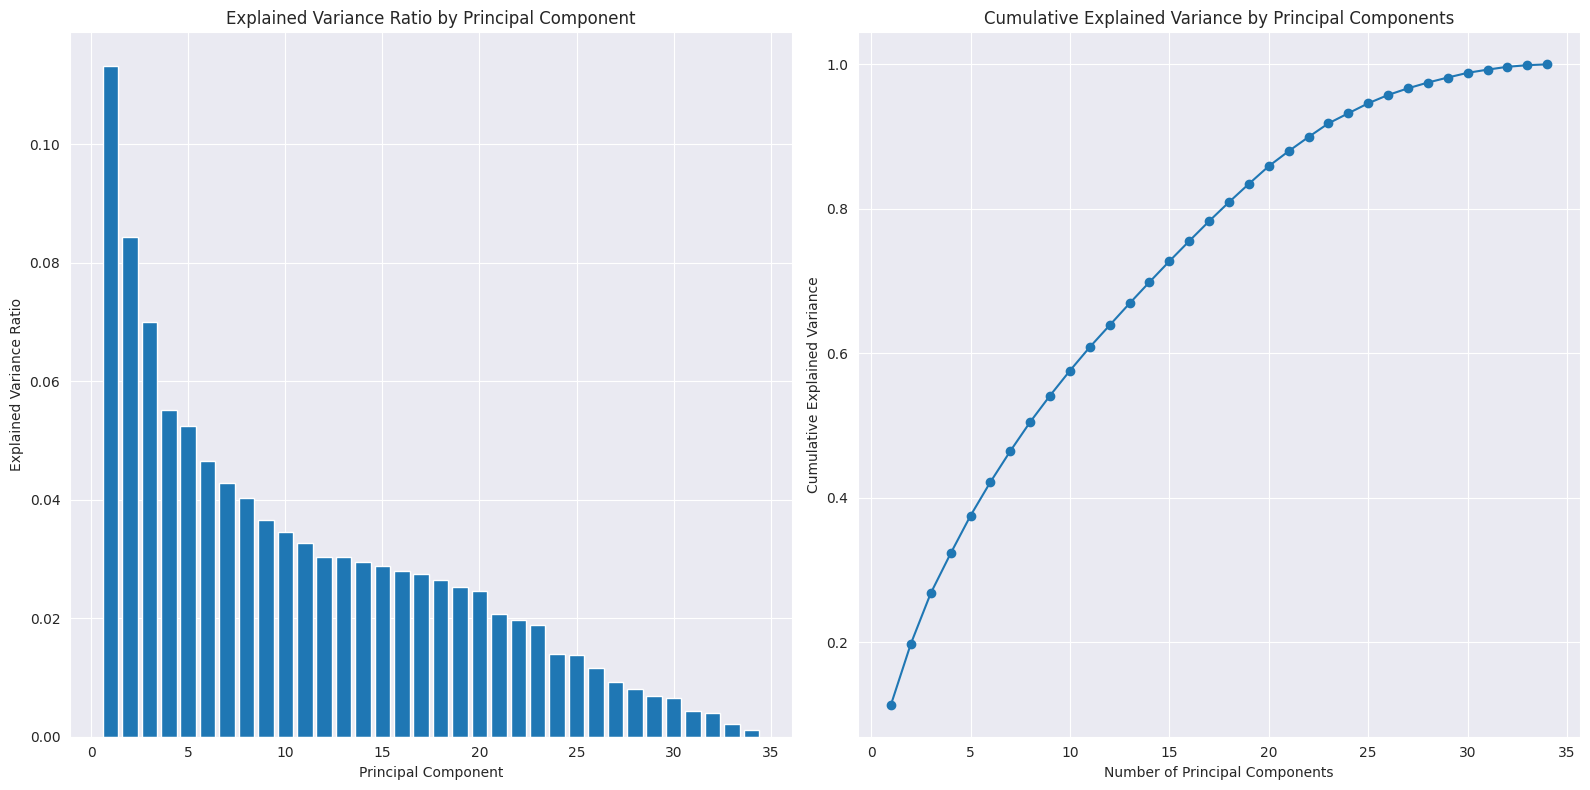

In [ ]:
# Standardize the features

X1_scaled = scaler.fit_transform(X1)

# Perform PCA
pca = PCA()
X1_pca = pca.fit_transform(X1_scaled)

# Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Create a 2x1 grid of subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# Plot the explained variance ratio in the first subplot
ax1.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
ax1.set_xlabel("Principal Component")
ax1.set_ylabel("Explained Variance Ratio")
ax1.set_title("Explained Variance Ratio by Principal Component")

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plot the cumulative explained variance in the second subplot
ax2.plot(
    range(1, len(cumulative_explained_variance) + 1),
    cumulative_explained_variance,
    marker="o",
)
ax2.set_xlabel("Number of Principal Components")
ax2.set_ylabel("Cumulative Explained Variance")
ax2.set_title("Cumulative Explained Variance by Principal Components")

# Display the figure
plt.tight_layout()
plt.show()

In [ ]:
#Как видно из графиков, основными являются первые 16 признаков, они охватывают более 80% общей дисперсии

In [ ]:
X1 = X.drop(columns = 'expired')
X1 = X.drop(columns = 'term_indebtedness_interest')
X1 = X.drop(columns = 'term_indebtedness_body_loan')
X1 = X.drop(columns = 'type_credit')
X1 = X.drop(columns = 'gender')
X1 = X.drop(columns = 'maximum_amount_overdue_indebtedness')
#X1 = X.drop(columns = 'availability_support')
X1 = X.drop(columns = 'overdue_indebtedness_body_loan')
X1 = X.drop(columns = 'overdue_indebtedness_interest')
X1 = X.drop(columns = 'overdue_indebtedness_other')
X1 = X.drop(columns = 'term_indebtedness_other')
X1 = X.drop(columns = 'amount_surety')

In [ ]:
X1 = X.drop(columns = 'overdue_indebtedness_body_loan')
X1 = X.drop(columns = 'overdue_indebtedness_interest')
X1 = X.drop(columns = 'overdue_indebtedness_other')
X1 = X.drop(columns = 'term_indebtedness_other')
X1 = X.drop(columns = 'amount_surety')

In [ ]:
X1.shape


(87315, 34)

In [ ]:
y = to_categorical(y, num_classes = 4)

print('Размер y:',y.shape)

Размер y: (87315, 4)


In [ ]:
# разбиваем на train и test
x1_train, x1_test, y1_train, y1_test = train_test_split(X1, y, shuffle=True, test_size=0.2, random_state=42, stratify=y)
print('Размер x1_train:',x1_train.shape)
print('Размер y1_train:',y1_train.shape)

Размер x1_train: (69852, 34)
Размер y1_train: (69852, 4)


In [ ]:
number_of_cols = x1_train.shape[1]

model123 = Sequential() # Последовательная модель нейронной сети

model123.add(Dense(512, input_dim=number_of_cols, activation='relu'))

model123.add(Dense(256, activation='relu'))
#model12.add(Dense(32, activation='relu'))
model123.add(Dense(4, activation='softmax'))

model123.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 512)               17920     
                                                                 
 dense_16 (Dense)            (None, 256)               131328    
                                                                 
 dense_17 (Dense)            (None, 4)                 1028      
                                                                 
Total params: 150276 (587.02 KB)
Trainable params: 150276 (587.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model123.compile(optimizer=Adam(learning_rate=0.005),
              metrics=['accuracy'],
              loss='CategoricalCrossentropy')

Epoch 1/100
69/69 [==============================] - 3s 31ms/step - loss: 7294.4937 - accuracy: 0.2873 - val_loss: 1.6347 - val_accuracy: 0.2806
Epoch 2/100
69/69 [==============================] - 2s 25ms/step - loss: 1.5242 - accuracy: 0.2739 - val_loss: 1.4173 - val_accuracy: 0.2670
Epoch 3/100
69/69 [==============================] - 2s 26ms/step - loss: 1.5285 - accuracy: 0.2719 - val_loss: 1.4131 - val_accuracy: 0.2735
Epoch 4/100
69/69 [==============================] - 2s 29ms/step - loss: 1.4950 - accuracy: 0.2749 - val_loss: 1.4650 - val_accuracy: 0.2742
Epoch 5/100
69/69 [==============================] - 2s 26ms/step - loss: 1.4059 - accuracy: 0.2733 - val_loss: 1.3813 - val_accuracy: 0.2734
Epoch 6/100
69/69 [==============================] - 3s 41ms/step - loss: 1.3712 - accuracy: 0.2795 - val_loss: 1.3768 - val_accuracy: 0.2782
Epoch 7/100
69/69 [==============================] - 3s 44ms/step - loss: 1.3718 - accuracy: 0.2734 - val_loss: 1.3887 - val_accuracy: 0.2734
Epo

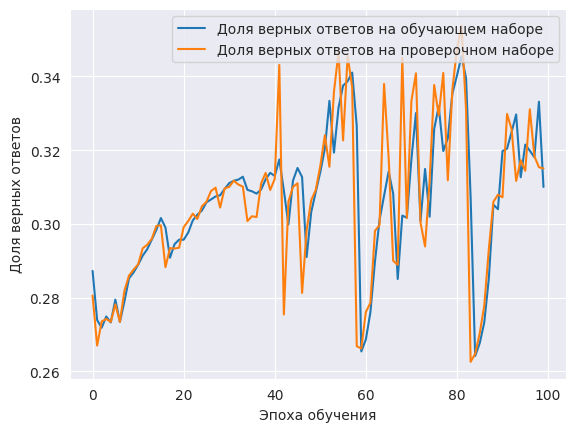

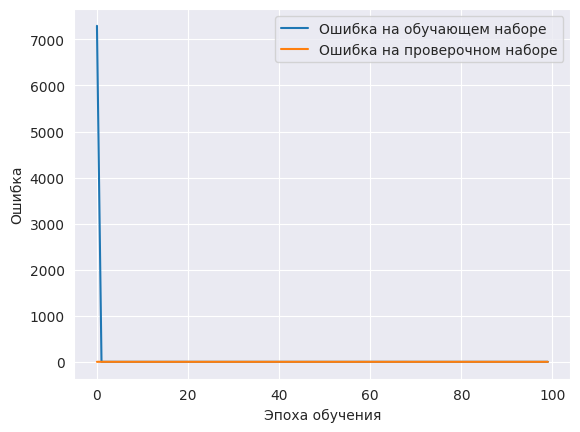

In [ ]:
import time
start_time = time.time() # счетчик времени
history_1 = model123.fit(x1_train,                            # Обучающая выборка
                        y1_train,                               # Метки классов обучающей выборки
                        epochs=100,                             # Количество эпох
                        batch_size=1024,                         # Размер подвыборки для одного шага по данным на эпохе
                        validation_data=(x1_test, y1_test))   # Проверочная выборка и метки классов проверочной выборки

end_time = time.time() # счетчик времени
print("Время обучения: ", end_time - start_time) # вывод времени обучения
total_time = end_time - start_time # calculate the total time

print("Total time taken:", total_time, "seconds") # print the total time taken to train the model
print(max(history_1.history['accuracy'])) # print the highest accuracy achieved by the model

plt.plot(history_1.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history_1.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

plt.plot(history_1.history['loss'],
         label='Ошибка на обучающем наборе')
plt.plot(history_1.history['val_loss'],
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

In [ ]:
model123.save('/content/gdrive/MyDrive/Colab Notebooks/Скоринг/model123.keras')

In [ ]:
loss, acc = model123(x_test, y_test, verbose=0) #classification

y_predictions = model123(x_test)# оценка производительности модели

ValueError: ignored

#Загрузка тестовой базы

In [ ]:
db_test = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Скоринг/Test1.csv')

<ipython-input-103-a06967b04cc2>:1: DtypeWarning: Columns (15,31,33,37,40) have mixed types. Specify dtype option on import or set low_memory=False.
  db_test = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Скоринг/Test1.csv')


In [ ]:
db_test.shape

(139221, 42)

In [ ]:
db_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 42 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   region_name                          25442 non-null  object 
 1   city_name                            25442 non-null  object 
 2   population                           25442 non-null  float64
 3   date of birth                        25552 non-null  object 
 4   gender                               25552 non-null  object 
 5   education                            20789 non-null  object 
 6   position                             24903 non-null  object 
 7   dt_nbki                              25552 non-null  object 
 8   id_nbki                              25552 non-null  object 
 9   issued                               25526 non-null  object 
 10  amount                               25526 non-null  float64
 11  currency                    

In [ ]:
db_test['Client_class'].unique()

array([0, 1, 2, 3])

In [ ]:
db_test['Client_class'].isnull().mean()*100

0.0

In [ ]:
db_test = db_test.drop(columns=['period_interest', 'days_overdue', 'volume_commitment', 'surety_period',
       'beginning_days_delinquency_counting', 'type_debt', 'availability_support'])

In [ ]:
obj_db = db_test.select_dtypes(include=['object']).copy()
obj_db.dtypes

region_name           object
city_name             object
date of birth         object
gender                object
education             object
position              object
dt_nbki               object
id_nbki               object
issued                object
currency              object
type_credit           object
status_credit         object
period                object
last_payment          object
updated               object
source_information    object
date_credit_state     object
dtype: object

In [ ]:
db_test["region_name"] = db_test["region_name"].astype('category')
db_test["region_name"] = db_test["region_name"].cat.codes

In [ ]:
db_test["city_name"] = db_test["city_name"].astype('category')
db_test["city_name"] = db_test["city_name"].cat.codes

In [ ]:
db_test["date of birth"] = db_test["date of birth"].astype('category')
db_test["date of birth"] = db_test["date of birth"].cat.codes

In [ ]:
db_test["gender"] = db_test["gender"].astype('category')
db_test["gender"] = db_test["gender"].cat.codes

In [ ]:
db_test["education"] = db_test["education"].astype('category')
db_test["education"] = db_test["education"].cat.codes

In [ ]:
db_test["position"] = db_test["position"].astype('category')
db_test["position"] = db_test["position"].cat.codes

In [ ]:
db_test["dt_nbki"] = db_test["dt_nbki"].astype('category')
db_test["dt_nbki"] = db_test["dt_nbki"].cat.codes

In [ ]:
db_test["id_nbki"] = db_test["id_nbki"].astype('category')
db_test["id_nbki"] = db_test["id_nbki"].cat.codes

In [ ]:
db_test["issued"] = db_test["issued"].astype('category')
db_test["issued"] = db_test["issued"].cat.codes

In [ ]:
db_test["type_credit"] = db_test["type_credit"].astype('category')
db_test["type_credit"] = db_test["type_credit"].cat.codes

In [ ]:
db_test["status_credit"] = db_test["status_credit"].astype('category')
db_test["status_credit"] = db_test["status_credit"].cat.codes

In [ ]:
db_test["period"] = db_test["period"].astype('category')
db_test["period"] = db_test["period"].cat.codes

In [ ]:
db_test["last_payment"] = db_test["last_payment"].astype('category')
db_test["last_payment"] = db_test["last_payment"].cat.codes

In [ ]:
db_test["updated"] = db_test["updated"].astype('category')
db_test["updated"] = db_test["updated"].cat.codes

In [ ]:
db_test["source_information"] = db_test["source_information"].astype('category')
db_test["source_information"] = db_test["source_information"].cat.codes

In [ ]:
db_test["date_credit_state"] = db_test["date_credit_state"].astype('category')
db_test["date_credit_state"] = db_test["date_credit_state"].cat.codes

In [ ]:
db_test = db_test.loc[db_test['currency'] == 'RUB']

In [ ]:
db_test['currency'].unique()

array(['RUB'], dtype=object)

In [ ]:
db_test = db_test.drop(columns='currency')#удаление столбца валюта

In [ ]:
from datetime import datetime
today = datetime.today()
db_test['date of birth'] = pd.to_datetime(db_test['date of birth'])
db_test['age'] = db_test['date of birth'].apply(
               lambda x: today.year - x.year -
               ((today.month, today.day) < (x.month, x.day))
               )

In [ ]:
db_test = db_test.drop(columns='date of birth')

In [ ]:
# Подсчет количества уникальных значений
education_counts = db_test['education'].value_counts()

# Вычисление процентного соотношения
education_percentages = round((education_counts / education_counts.sum()) * 100, 3)

# Вывод результатов
print(education_percentages)


Среднее              37.289
СреднеТехническое    35.928
Высшее               21.319
НеполноеВысшее        2.987
НеполноеСреднее       2.477
Name: education, dtype: float64


In [ ]:
# Создаем словарь с соответствиями значений для замены
replace_dict = {
    'СреднеТехническое': 'Среднее',
    'НесколькоВысших': 'Высшее',
    'НеполноеВысшее': 'Неполное',
    'НеполноеСреднее': 'Неполное',
    'УченаяСтепень': 'Высшее'
}

# Заменяем значения в столбце 'education' с использованием словаря замены
db_test['education'] = db_test['education'].replace(replace_dict)

In [ ]:
# Пустые значения
db_test['education'] = db_test['education'].fillna('Неполное')
db_test['education'].isnull().mean()*100

0.0

In [ ]:
from sklearn import preprocessing  # кодировка переменной



my_label = preprocessing.LabelEncoder()

In [ ]:
db_test['education']= my_label.fit_transform(db_test['education'])
print(db_test['education'].unique())
print("Data Frame after Label Encoding:\n")
db_test.head(5)

[1 2 0]
Data Frame after Label Encoding:



,region_name,city_name,population,gender,education,position,dt_nbki,id_nbki,issued,amount,...,overdue_indebtedness_interest,overdue_indebtedness_other,actual_payments_24_Months,amount_surety,source_information,maximum_amount_overdue_indebtedness,date_credit_state,amount_principal_debt_repaid,Client_class,age
0,Свердловская область,г.Каменск-Уральский,170922.0,Мужской,1,руководитель,2023-02-21,3cfbdefc-b1d3-11ed-b80d-3cfdfed12971,2013-11-07,290057.0,...,0.0,0.0,0.0,0.0,Банк,0.0,2017-12-19,0.00,0,32
1,Свердловская область,г.Каменск-Уральский,170922.0,Мужской,1,руководитель,2023-02-21,3cfbdefc-b1d3-11ed-b80d-3cfdfed12971,2013-09-23,0.0,...,0.0,0.0,0.0,0.0,Банк,0.0,2019-10-09,19877.53,0,32
2,Свердловская область,г.Каменск-Уральский,170922.0,Мужской,1,руководитель,2023-02-21,3cfbdefc-b1d3-11ed-b80d-3cfdfed12971,2015-12-09,30000.0,...,0.0,0.0,0.0,0.0,МФО,0.0,2016-09-07,30000.00,0,32
3,Свердловская область,г.Каменск-Уральский,170922.0,Мужской,1,руководитель,2023-02-21,3cfbdefc-b1d3-11ed-b80d-3cfdfed12971,2016-08-08,26000.0,...,0.0,0.0,0.0,0.0,МФО,0.0,2017-02-06,26000.00,0,32
4,Свердловская область,г.Каменск-Уральский,170922.0,Мужской,1,руководитель,2023-02-21,3cfbdefc-b1d3-11ed-b80d-3cfdfed12971,2016-12-28,40000.0,...,0.0,0.0,0.0,0.0,МФО,0.0,2019-02-28,28621.52,0,32


In [ ]:
# Подсчет количества уникальных значений
position_counts = db_test['position'].value_counts()

# Вычисление процентного соотношения
position_percentages = round((position_counts / position_counts.sum()) * 100, 3)

# Вывод результатов
position_percentages

пенсионер                                 28.242
рабочий                                   14.922
сотрудник малого бизнеса                  12.135
специалист                                 8.356
работник промышленных предприятий          6.714
сотрудники крупного бизнеса                6.244
работник бюджетной сферы                   5.638
муниципальный служащий                     3.690
прочее                                     2.686
индивидуальный предприниматель (ип)        2.080
госслужащий                                2.040
работник с/х                               1.763
самозанятый                                1.422
военнослужащий                             1.285
работник социальной сферы                  1.000
технический специалист                     0.811
руководитель                               0.622
сотрудник градообразующего предприятия     0.349
Name: position, dtype: float64

In [ ]:
replace_dict1 = {
    'государственные служащие высоких чинов': 'госслужащий',
    'судебная власть, права человека': 'госслужащий',
    'технический специалист': 'специалист',
    'работник социальной сферы': 'прочее',
    'работник с/х': 'прочее',
    'сотрудник градообразующего предприятия': 'рабочий',
    'муниципальный служащий': 'работник бюджетной сферы',
    'госслужащий': 'работник бюджетной сферы',
    'военнослужащий': 'прочее',
    'руководитель': 'специалист',
    'самозанятый': 'прочее',
    'муниципальный служащий': 'работник бюджетной сферы',
    'разнорабочий': 'рабочий',
    'сварщик': 'рабочий',
    'водитель': 'рабочий',
}

In [ ]:
# Заменяем значения в столбце 'position' с использованием словаря замены
db_test['position'] = db_test['position'].replace(replace_dict1)

In [ ]:
# Пустые значения
db_test['position'] = db_test['position'].fillna('прочее')
db_test['position'].isnull().mean()*100

0.0

In [ ]:
db_test['position']= my_label.fit_transform(db_test['position']) # кодировка переменной
print(db_test['position'].unique())
print("Data Frame after Label Encoding:\n")


[8 2 1 7 4 3 6 0 5]
Data Frame after Label Encoding:



In [ ]:
db_test['gender']= my_label.fit_transform(db_test['gender'])  # кодировка переменной
print(db_test['gender'].unique())
print("Data Frame after Label Encoding:\n")


[1 0]
Data Frame after Label Encoding:



In [ ]:
db_test = db_test.drop(columns='currency')#удаление столбца валюта

In [ ]:
replace_dict2 = {
    'ИпотекаПервичныйРынок': 'ДругойТипКредита',
    'ИпотекаВторичныйРынок': 'ДругойТипКредита',
    'НаОбучение': 'ДругойТипКредита',
    'НаСтроительство': 'ДругойТипКредита',
    'БанковскаяГарантия': 'ДругойТипКредита',
    'PDLЗайм': 'ДругойТипКредита',
    'ДоговорПоручительства': 'ДругойТипКредита',
    'НаРазвитиеБизнеса': 'ДругойТипКредита',
    'НаПополнениеОборотныхСредств': 'ДругойТипКредита',
    'ДебетоваяКартаСОвердрафтом': 'ДругойТипКредита',
    'КредитНаличнымиНецелевой': 'ДругойТипКредита',
    'КредитНаАвтомобиль': 'ДругойТипКредита',
    'Овердрафт': 'ДругойТипКредита',
    'НаПокупкуОборудования': 'ДругойТипКредита',
    'Ипотека': 'ДругойТипКредита',
    'Потребительский': 'ДругойТипКредита',
    'КредитнаяКарта': 'ДругойТипКредита'
}


In [ ]:
# Заменяем значения в столбце 'type_credit' с использованием словаря замены
db_test['type_credit'] = db_test['type_credit'].replace(replace_dict2)

In [ ]:
# Пустые значения
db_test['type_credit'] = db_test['type_credit'].fillna('ДругойТипКредита')
db_test['type_credit'].isnull().mean()*100

0.0

In [ ]:
db_test['type_credit']= my_label.fit_transform(db_test['type_credit'])  # кодировка переменной
print(db_test['type_credit'].unique())
print("Data Frame after Label Encoding:\n")

[0 1]
Data Frame after Label Encoding:



In [ ]:
db_test = db_test.drop(columns='region_name')#удаление столбца region_name

In [ ]:
db_test = db_test.drop(columns='city_name')

In [ ]:
db_test = db_test.dropna (subset=['population'])#удаление строк с пустым population

In [ ]:
db_test['status_credit'].value_counts()

СчетЗакрыт                                 19216
Активный                                    3849
Просрочен                                   1483
ПереданНаОбслуживаниеВДругуюОрганизацию      691
ПередачаДанныхПрекращена                      88
ПроблемыСВозвратом                            56
Рефинансирован                                23
Банкротство                                    2
СписанСБаланса                                 2
Спор                                           1
ОплаченЗаСчетОбеспечения                       1
Name: status_credit, dtype: int64

In [ ]:
# Создаем словарь с соответствиями значений для замены
db_test.loc[db_test["status_credit"] == "СчетЗакрыт", "status_credit"] = 0
db_test.loc[db_test["status_credit"] == "Активный", "status_credit"] = 2
db_test.loc[db_test["status_credit"] == "Просрочен", "status_credit"] = 1
db_test.loc[db_test["status_credit"] == "ПереданНаОбслуживаниеВДругуюОрганизацию", "status_credit"] = 1
db_test.loc[db_test["status_credit"] == "ПередачаДанныхПрекращена", "status_credit"] = 1
db_test.loc[db_test["status_credit"] == "ПроблемыСВозвратом", "status_credit"] = 1
db_test.loc[db_test["status_credit"] == "Рефинансирован", "status_credit"] = 1
db_test.loc[db_test["status_credit"] == "Банкротство", "status_credit"] = 1
db_test.loc[db_test["status_credit"] == "СписанСБаланса", "status_credit"] = 1
db_test.loc[db_test["status_credit"] == "ПринудительноеИсполнение", "status_credit"] = 1
db_test.loc[db_test["status_credit"] == "Спор", "status_credit"] = 1
db_test.loc[db_test["status_credit"] == "ОплаченЗаСчетОбеспечения", "status_credit"] = 1
db_test.loc[db_test["status_credit"] == "Расторгнут", "status_credit"] = 1

In [ ]:
db_test = db_test.dropna (subset=['status_credit'])#удаление строк с пустым status_credit

In [ ]:
db_test['status_credit']= my_label.fit_transform(db_test['status_credit'])  # кодировка переменной
print(db_test['status_credit'].unique())
print("Data Frame after Label Encoding:\n")

[0 1 2]
Data Frame after Label Encoding:



In [ ]:
#db_test = db_test.drop(columns='source_information')#удаление столбца source_information

In [ ]:
db_test['source_information'] = db_test['source_information'].replace(replace_dict3)

In [ ]:
db_test['source_information']= my_label.fit_transform(db_test['source_information'])  # кодировка переменной
print(db_test['source_information'].unique())
print("Data Frame after Label Encoding:\n")
db.head(5)

[2 0 1]
Data Frame after Label Encoding:



,population,gender,education,position,dt_nbki,id_nbki,issued,amount,type_credit,status_credit,...,overdue_indebtedness_interest,overdue_indebtedness_other,actual_payments_24_Months,amount_surety,source_information,maximum_amount_overdue_indebtedness,date_credit_state,amount_principal_debt_repaid,Client_class,age
0,618150.0,1,0,6,2022,1575,2022,1720.0,1,0,...,0.0,0.0,0.0,0.0,2,0.0,2022,1720.00,1,31
1,618150.0,1,0,6,2022,1575,2022,2920.0,1,2,...,0.0,0.0,0.0,0.0,2,0.0,2022,265.45,1,31
2,22408.0,0,2,6,2022,483,2022,3000.0,1,0,...,0.0,0.0,0.0,0.0,2,0.0,2022,3000.00,1,56
3,22408.0,0,2,6,2022,483,2022,1960.0,1,2,...,0.0,0.0,0.0,0.0,2,0.0,2022,2040.00,1,56
4,22408.0,0,2,6,2022,483,2022,4000.0,1,2,...,0.0,0.0,0.0,0.0,2,0.0,2022,2012.00,1,56


In [ ]:
db_test['issued'] = pd.to_datetime(db_test['issued'])

In [ ]:
db_test['issued'] = db_test['issued'].dt.year

In [ ]:
index = db_test[db_test['issued'] < 2021.00].index#оставляем только кредиты выданные ранее 2021 года
db_test.drop(index, inplace=True)

In [ ]:
db_test['issued'].value_counts()

2022    7308
2021    5001
2023     362
Name: issued, dtype: int64

In [ ]:
CLMN = "period"
value_for_NA = pd.to_datetime("1900-01-01 00:00:00")
# преобразование в пандосовский тип дат
db_test[CLMN] = pd.to_datetime(db_test[CLMN], errors='coerce').fillna(value_for_NA)
print(type(db_test["period"]))
# Преобразование столбца 'period' в тип данных datetime, если он еще не является datetime
db_test['period'] = pd.to_datetime(db_test['period'])

<class 'pandas.core.series.Series'>


In [ ]:
db_test['period'] = db_test['period'].dt.year
index = db_test[db_test['period'] < 2021.00].index#оставляем только кредиты со сроком погашения не ранее 2021 года (т.к. и выдачу ограничили 2021)
db_test.drop(index, inplace=True)

In [ ]:
# Преобразование столбца 'last_payment' в тип данных datetime, если он еще не является datetime
db_test['last_payment'] = pd.to_datetime(db_test['last_payment'])

db_test['last_payment'] = db_test['last_payment'].dt.year

db_test.loc[db_test["last_payment"] == 1900, "last_payment"] = 2021 # фильтрация по дате открытия и по дате закрытия ранее была. Заменим данное значение ранним годом из всех вариантов для того чтобы не терать данные

# Пустые значения
db_test['last_payment'] = db_test['last_payment'].fillna(2021.00)
db_test['last_payment'].isnull().mean()*100

0.0

In [ ]:
# Преобразование столбца 'dt_nbki' в тип данных datetime, если он еще не является datetime
db_test['dt_nbki'] = pd.to_datetime(db_test['dt_nbki'])

db_test['dt_nbki'] = db_test['dt_nbki'].dt.year


In [ ]:
db_test = db_test.drop(columns='updated')# удалила столбец, он почти полностью дублирует следующий и вряд ли несет смысловую нагрузку

In [ ]:
# Преобразование столбца 'date_credit_state' в тип данных datetime, если он еще не является datetime
db_test['date_credit_state'] = pd.to_datetime(db_test['date_credit_state'])

db_test['date_credit_state'] = db_test['date_credit_state'].dt.year

index = db_test[db_test['date_credit_state'] < 2011.00].index
db_test.drop(index, inplace=True)

# Пустые значения
db_test['date_credit_state'] = db_test['date_credit_state'].fillna(2021.00)
db_test['date_credit_state'].isnull().mean()*100

0.0

In [ ]:
db_test['id_nbki']= my_label.fit_transform(db_test['id_nbki'])  # кодировка переменной
print(db_test['id_nbki'].unique())
print("Data Frame after Label Encoding:\n")

[158 409  96  73 325  59 249 636  36 385 357 422  95 461 187  38 291 588
 318 583 109 453   4 367 529 493 340 650 608 647 424 133 307 447 326 194
 504 439 544 102   5 460 294 283 566  48  55 634 374 489 626 218  75 183
 344   0 519 182 508 324 624 614 405 101 288 448 470 269 360 117 108 399
 635 490 366 151  63 497 286 369 411 602 136 645 522 315 533 565 511   3
  22 505  87  89 603 308 390 523  85 421  44 611 393 481 154 548 321  20
   1 164 452 604 498 423 593 363  40 189 128  57  65  51 300 169  99 541
 132 467  26 105 623 577 338 230 615 225 486 115 384 122 237 266  58 364
  98 258 638 223 163  50  53 591 362 429 377 295  30 546 347 316  82 142
  69  23 279  12 346 343  49 520 554 162  72 586 531 552 302 567 365 172
 612  83 310 530 256 205 562 469 196 503  84 274 450 618 323 589 551 134
 165 118 573 175 610 161 156 372 171 464  37 484 561 557 537 499 571  76
 314 140 155 234 119 188 403 406 207 528 257 273 599 190 526 298 435 125
  86 381 500 198 243 248 416 637 598 438 176 568 53

In [ ]:
db_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25539 entries, 0 to 25551
Data columns (total 34 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   region_name                          25539 non-null  int8   
 1   city_name                            25539 non-null  int16  
 2   population                           25429 non-null  float64
 3   date of birth                        25539 non-null  int16  
 4   gender                               25539 non-null  int8   
 5   education                            25539 non-null  int8   
 6   position                             25539 non-null  int8   
 7   dt_nbki                              25539 non-null  int16  
 8   id_nbki                              25539 non-null  int16  
 9   issued                               25539 non-null  int16  
 10  amount                               25525 non-null  float64
 11  type_credit                 

#Предсказание на тестовой базе

In [ ]:
db_test = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Скоринг/db_test_cat_cl.csv')

In [ ]:
db_test = db# возвращаем переменной датафрейм тестовый после обработки на пропущенные значения и перевот в категории

In [ ]:
Xt = db_test.drop('Client_class', axis=1)
yt = np.array(db_test['Client_class'])

In [ ]:
db_test['Client_class'].unique()

array([0, 1, 2, 3])

In [ ]:
Xt.shape

(138994, 35)

In [ ]:
yt.shape

(138994,)

In [ ]:
yt = utils.to_categorical(yt)

In [ ]:
 # Нормализуем данные
scaler = StandardScaler(with_mean=False) # Нормализуем данные
scaler.fit(Xt)
xt = scaler.transform(Xt)

In [ ]:
xt

array([[2.39128619, 3.04847426, 0.26818047, ..., 1.84004257, 0.        ,
        1.58632411],
       [2.39128619, 3.04847426, 0.26818047, ..., 2.69926361, 0.304755  ,
        1.58632411],
       [2.39128619, 3.04847426, 0.26818047, ..., 1.28014581, 0.45994899,
        1.58632411],
       ...,
       [0.09760352, 2.26056092, 0.28601869, ..., 4.13040784, 0.        ,
        0.        ],
       [0.09760352, 2.26056092, 0.28601869, ..., 4.12639903, 0.        ,
        0.        ],
       [0.09760352, 2.26056092, 0.28601869, ..., 4.14377053, 0.        ,
        0.        ]])

In [ ]:
xt_train, xt_test, yt_train, yt_test = train_test_split(xt, yt, shuffle=True, test_size=0.2, random_state=42, stratify=yt)
print('Размер xt_train:',xt_train.shape)
print('Размер yt_train:',yt_train.shape)

Размер xt_train: (20328, 34)
Размер yt_train: (20328,)


In [ ]:

# Преобразование ответов в формат one_hot_encoding
yt_train = utils.to_categorical(yt_train)
yt_test = utils.to_categorical(yt_test)

print('Размер yt_train:',yt_train.shape)
print('Размер yt_test:',yt_test.shape)

# подготовка к обучению модели
scaler = StandardScaler()
scaler.fit(xt_test)

Размер yt_train: (20328, 4)
Размер yt_test: (5082, 4)


StandardScaler()

In [ ]:
model = load_model('/content/gdrive/MyDrive/Colab Notebooks/Скоринг/model.keras')

In [ ]:
loss, acc = model12_cl.evaluate(xt, yt) #classification

y_predictions = model12_cl.predict(xt)# оценка производительности модели

4344/4344 [==============================] - 12s 3ms/step


In [ ]:
acc

0.04008806124329567

In [ ]:
loss, acc = model22_cl.evaluate(xt, yt) #classification

y_predictions = model22_cl.predict(xt)# оценка производительности модели

4344/4344 [==============================] - 15s 3ms/step


In [ ]:
acc

0.12986890971660614

#Предсказание на тестовой базе без id_nbki

In [ ]:
Xt1 = Xt.drop(columns = 'id_nbki')

In [ ]:
Xt1 = Xt.drop(columns = 'expired')
Xt1 = Xt.drop(columns = 'term_indebtedness_interest')
Xt1 = Xt.drop(columns = 'term_indebtedness_body_loan')
Xt1 = Xt.drop(columns = 'type_credit')
Xt1 = Xt.drop(columns = 'gender')
Xt1 = Xt.drop(columns = 'maximum_amount_overdue_indebtedness')
#Xt1 = X.drop(columns = 'availability_support')
Xt1 = Xt.drop(columns = 'overdue_indebtedness_body_loan')
Xt1 = Xt.drop(columns = 'overdue_indebtedness_interest')
Xt1 = Xt.drop(columns = 'overdue_indebtedness_other')
Xt1 = Xt.drop(columns = 'term_indebtedness_other')
Xt1 = Xt.drop(columns = 'amount_surety')

In [ ]:
Xt1.shape

(25410, 33)

In [ ]:
 # Нормализуем данные
scaler = StandardScaler(with_mean=False) # Нормализуем данные
scaler.fit(Xt1)
xt1 = scaler.transform(Xt1)

In [ ]:
print('Размер Xt1:',Xt1.shape)
print('Размер yt:',yt.shape)

Размер Xt1: (25410, 33)
Размер yt: (25410, 4)


In [ ]:
# Преобразование ответов в формат one_hot_encoding
yt1 = utils.to_categorical(yt)

In [ ]:
# разбиваем на train и test
xt1_train, xt1_test, yt1_train, yt1_test = train_test_split(Xt1, yt, shuffle=True, test_size=0.2, random_state=42, stratify=yt)
print('Размер xt1_train:',xt1_train.shape)
print('Размер yt1_train:',yt1_train.shape)
print('Размер yt1_testn:',yt1_test.shape)

Размер xt1_train: (20431, 32)
Размер yt1_train: (20431,)
Размер yt1_testn: (5108,)


In [ ]:

# Преобразование ответов в формат one_hot_encoding
yt1_train = utils.to_categorical(yt1_train)
yt1_test = utils.to_categorical(yt1_test,4)

print('Размер yt1_train:',yt1_train.shape)
print('Размер yt1_test:',yt1_test.shape)

# подготовка к обучению модели
scaler = StandardScaler()
scaler.fit(xt1_test)

Размер yt1_train: (20431, 4)
Размер yt1_test: (5108, 4)


StandardScaler()

In [ ]:
loss, acc = model123.evaluate(Xt1, yt) #classification

y_predictions = model123.predict(Xt1)# оценка производительности модели

795/795 [==============================] - 1s 1ms/step
